# The third set of COVID-A2B data, with likelihood to each consistent contact!

really hope this is the last set......

In [1309]:
# Import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1310]:
df_all_pairs = pd.read_excel('hosp3_consistent_contacts_with_likelihood.xlsx', sheet_name= 'Consistent_contacts3') 

df_all_pairs.From = df_all_pairs.From.str.replace('Case_','')
df_all_pairs.From = df_all_pairs.From.astype(np.int64)

df_all_pairs.To = df_all_pairs.To.str.replace('Case_','')
df_all_pairs.To = df_all_pairs.To.astype(np.int64)
df_all_pairs

FileNotFoundError: [Errno 2] No such file or directory: 'hosp3_consistent_contacts_with_likelihood.xlsx'

In [ ]:
snp_distance_matrix = pd.read_excel('..\snp_dists\hospital3_snpdists.xlsx',sheet_name='hospital3_snpdists')
snp_dist = pd.melt(snp_distance_matrix,id_vars=['snp-dists 0.7.0'],var_name='To',value_name='snp_distance',value_vars=snp_distance_matrix.columns.values[1:])
snp_dist.rename(columns={'snp-dists 0.7.0':'From'},inplace=True)
snp_dist.replace({"hospital_3_":""},regex=True,inplace=True)
snp_dist['From_To']=snp_dist['From'].astype(str)+snp_dist['To'].astype(str)
snp_dist_dict = snp_dist[['From_To','snp_distance']].set_index('From_To')['snp_distance'].to_dict()

In [ ]:
df_all_pairs['From_To'] = df_all_pairs['From'].astype(str) + df_all_pairs['To'].astype(str)
df_all_pairs['snp_dist'] = df_all_pairs['From_To'].map(snp_dist_dict)
df_all_pairs = df_all_pairs.drop(['From_To'],axis=1)
df_all_pairs

,From,To,Likelihood,Transmission possibility,snp_dist
0,240,206,-4.90881,Consistent,1
1,199,196,-5.30996,Consistent,1
2,205,215,-5.48257,Consistent,2
3,232,205,-5.54420,Consistent,2
4,240,207,-5.65399,Consistent,2
...,...,...,...,...,...
57,236,252,-10.57290,Consistent,7
58,214,252,-10.80220,Consistent,7
59,206,252,-13.13550,Consistent,6
60,244,252,-13.86160,Consistent,5


In [ ]:
#Select only transmissions that are consistent with Bayesian analysis
df_consistent_transmissions = df_all_pairs[df_all_pairs['Transmission possibility'] == 'Consistent']
print(df_consistent_transmissions) #62 pairs

    From   To  Likelihood Transmission possibility  snp_dist
0    240  206    -4.90881               Consistent         1
1    199  196    -5.30996               Consistent         1
2    205  215    -5.48257               Consistent         2
3    232  205    -5.54420               Consistent         2
4    240  207    -5.65399               Consistent         2
..   ...  ...         ...                      ...       ...
57   236  252   -10.57290               Consistent         7
58   214  252   -10.80220               Consistent         7
59   206  252   -13.13550               Consistent         6
60   244  252   -13.86160               Consistent         5
61   239  252   -15.55200               Consistent         9

[62 rows x 5 columns]


In [ ]:
pd.set_option('display.max_columns', 50)
metadata3 = pd.read_excel('../Hospital 3 - job description of the 8 health care workers + meta copy.xlsx', sheet_name='copy from metadata')

metadata3['Date of symptom onset (dd/mm/yy)'] = pd.to_datetime(metadata3['Date of symptom onset (dd/mm/yy)'],unit='D')
metadata3['Date of testing'] = pd.to_datetime(metadata3['Date of testing'],unit = 'D')
metadata3.head(11)

,Sample Id,Age,Sex,Occupation (1. Health care worker; 2. Frontline worker; 3 any other (specify),Designation,Date of symptom onset (dd/mm/yy),Symptoms 1. Fever; 2. Dry cough; 3. Breathlessness; 4. Loss of taste/smell; 5. Sore throat; 6. Any other (specify),Type of test (RTPCR/RAT),Date of testing,Days (positive test-2nd dose),vaccination status,Date of first healthcare access after symptom onset or positive result,Hospitalized 1. Yes; 2. No,Date of hospitalization,Required Oxygen 1. Yes; 2. No,ICU admission for assisted ventilation 1. Yes; 2. No,Outcome 1. Survived;2. Died,Received Vaccine 1. Yes; 2. No,If Yes 1. One dose; 2. Two dose,Date of 2nd dose of vaccine,Date of FULL VACCINATION STATUS,Sequencing result,COVID-19 infection in the past (Yes/No/DK),"Details of treatment (Eg: Remdisivir, etc)",TYPE OF COVID VACCINE,Type of Specimen,Date of collection of sample,Ct Value of RT PCR result,REMARKS (PLATFORM USED),COVID IgG Ab done after vaccination Yes/NO,COVID IgG Antibody titre ( AU/ml),METHOD,date of COVID IgG Ab test
0,193,26,M,Health care worker,INTERN,2021-04-25,"GENERALIZED WEAKNESS , SORE THROAT",RT-PCR,2021-04-26,NaN,unvaccinated,2021-04-26,2,NOT APPLICABLE,2,2,1,2,NOT APPLICABLE,NOT APPLICABLE,NaT,B.1.617.2,NO,"IVERMECTIN, AZITHROMYCIN, VIT C, ATOZ,",---,Nasopharyngeal and Oropharyngeal swab,2021-04-26,"E -21.1, ORF1A-20.3",TRUENAT,no,NaN,NaN,NaN
1,194,40,M,Health care worker,Hospital Assitant,2021-04-24,"COUGH, SORE THROAT, FEVER",RT-PCR,2021-04-26,NaN,unvaccinated,2021-04-26,1,30.04.2021,1,2,SURVIVED,2,NOT APPLICABLE,NOT APPLICABLE,NaT,B.1.617.2,NO,"IVERMECTIN, DOXYCYXLINE, VIT C, ATOZ,",---,Nasopharyngeal and Oropharyngeal swab,2021-04-26,"E- 15, ORF1aN2- 17.4",CBNAAT (GENEXPERT),NO,NaN,NaN,NaN
2,196,31,M,Health care worker,OT ASSTT,2021-04-24,"FEVER, SORE THROAT, BODY ACHE,",RT-PCR,2021-04-26,NaN,unvaccinated,2021-04-26,DON'T KNOW,NOT APPLICABLE,DON'T KNOW,DON'T KNOW,DON'T KNOW,DON'T KNOW,DON'T KNOW,DON'T KNOW,NaT,B.1.617.2,DON'T KNOW,DON'T KNOW,COVISHIELD,Nasopharyngeal and Oropharyngeal swab,2021-04-26,"E- 14.6, ORF1a- 14.2",TRUENAT,NO,NaN,NaN,NaN
3,199,53,F,Health care worker,Additional Chief Health Director /,2021-04-22,"Fever, bodyache",RT-PCR,2021-04-22,3.0,"2dose,<14days",2021-04-22,2,NOT APPLICABLE,2,2,1,1,2,2021-04-19 00:00:00,2021-05-03,B.1.617.2,NO,"IVERMECTIN, DOXYCYXLINE, VIT C, ATOZ,",COVISHIELD,Nasopharyngeal and Oropharyngeal swab,2021-04-22,"E- 16.3, N2-19.3",CBNAAT (GENEXPERT),NOT DONE,NaN,NaN,NaN
4,200,45,F,Health care worker,SR Divisional Medical Officer /,2021-04-22,"LOSS OF SMELL , FEVER, BODYACHE",RT-PCR,2021-04-22,68.0,"2 dose,>14days",2021-04-22,2,NOT APPLICABLE,2,2,1,1,2,2021-02-13 00:00:00,2021-02-27,B.1.1.7,NO,"IVERMECTIN, AZITHROMYCIN, DOXYXYXLINE, AUGMEN...",COVISHIELD,Nasopharyngeal and Oropharyngeal swab,2021-04-22,"E-23, ORF1A--23",TRUENAT,YES,72,CLIA,end march
5,203,50,F,Health care worker,Additional Chief Health Director,2021-04-19,"FEVER, BODY ACHE,",RT-PCR,2021-04-20,60.0,"2 dose,>14days",2021-04-20,2,NOT APPLICABLE,2,2,1,1,2,2021-02-19 00:00:00,2021-03-05,B.1.617.2,NO,"IVERMECTIN, DOXYCYXLINE, VIT C, ATOZ, ORAL STE...",COVISHIELD,Nasopharyngeal and Oropharyngeal swab,2021-04-19,"E-16.43, ORF1a- 16.5",TRUENAT,NOT DONE,NaN,NaN,NaN
6,204,32,M,Health care worker,DNB (Post Graduate Resident)/SURGERY,2021-04-16,"COUFH, FEVER, BREATHLESSNESS BODY ACHE, RUNNIN...",RT-PCR,2021-04-20,50.0,"2 dose,>14days",2021-04-20,2,NOT APPLICABLE,2,2,1,1,2,2021-03-01 00:00:00,2021-03-15,B.1,NO,"IVERMECTIN, DOXYCYXLINE, VIT C, ATOZ",COVISHIELD,Nasopharyngeal and Oropharyngeal swab,2021-04-19,"E-0, ORF1a- 28.67",TRUENAT,NOT DONE,NaN,NaN,NaN
7,205,44,F,Health care worker,SR Divisional Medical Officer / Paediatrician,2021-04-12,"FEVER,",RT-PCR,2021-04-19,59.0,"2 dose,>14days",2021-04-12,2,NOT APPLICABLE,2,2,1,1,2,2021-02-19 00:00:00,2021-03-05,B.1.617.2,NO,"IVERMECTIN, DOXYCYCLINE",COVISHIELD,Nasopharyngeal and Oropharyngeal swab,2021-04-19,"E- 17.14, ORF1a- 16.6",TRUENAT,NOT DONE,NaN,NaN,NaN
8,206,35,M

In [ ]:
full_vac = metadata3[(metadata3['vaccination status'] == '2 dose,>14days')|(metadata3['vaccination status'] =='2dose,<14days')]['Sample Id'].to_list()
len(full_vac) #new definition of full_vac, 27 for >14 days, 5 for <14 days

32

## Map data from metadata3 to consistent pairs

In [ ]:
df_consistent_transmissions

,From,To,Likelihood,Transmission possibility,snp_dist
0,240,206,-4.90881,Consistent,1
1,199,196,-5.30996,Consistent,1
2,205,215,-5.48257,Consistent,2
3,232,205,-5.54420,Consistent,2
4,240,207,-5.65399,Consistent,2
...,...,...,...,...,...
57,236,252,-10.57290,Consistent,7
58,214,252,-10.80220,Consistent,7
59,206,252,-13.13550,Consistent,6
60,244,252,-13.86160,Consistent,5


In [ ]:
type(metadata3['Sample Id'][0])
type(df_consistent_transmissions['To'][0])

numpy.int64

In [ ]:
id_test_date = metadata3[['Sample Id','Date of testing']].set_index('Sample Id')['Date of testing'].to_dict() #dictionary of sample Id: date of testing used for mapping later

#map test dates to each id
df_consistent_transmissions['From_test_date'] = df_consistent_transmissions['From'].map(id_test_date)
df_consistent_transmissions['To_test_date'] = df_consistent_transmissions['To'].map(id_test_date)


df_consistent_transmissions = df_consistent_transmissions[['From','From_test_date','To','To_test_date','Transmission possibility','Likelihood','snp_dist']] #simple rearrangement
df_consistent_transmissions = df_consistent_transmissions.sort_values(by = ['Likelihood'], ascending = False)
df_consistent_transmissions['day diff'] =  df_consistent_transmissions.To_test_date - df_consistent_transmissions.From_test_date

df_consistent_transmissions #(62,8) 

,From,From_test_date,To,To_test_date,Transmission possibility,Likelihood,snp_dist,day diff
0,240,2021-04-17,206,2021-04-19,Consistent,-4.90881,1,2 days
1,199,2021-04-22,196,2021-04-26,Consistent,-5.30996,1,4 days
2,205,2021-04-19,215,2021-04-14,Consistent,-5.48257,2,-5 days
3,232,2021-04-12,205,2021-04-19,Consistent,-5.54420,2,7 days
4,240,2021-04-17,207,2021-04-19,Consistent,-5.65399,2,2 days
...,...,...,...,...,...,...,...,...
57,236,2021-04-16,252,2021-04-29,Consistent,-10.57290,7,13 days
58,214,2021-04-15,252,2021-04-29,Consistent,-10.80220,7,14 days
59,206,2021-04-19,252,2021-04-29,Consistent,-13.13550,6,10 days
60,244,2021-04-23,252,2021-04-29,Consistent,-13.86160,5,6 days


In [ ]:
def mapping_data_to_id(new_term_name,mapped_term,insertion_before='',map_dataframe=metadata3,target_dataframe=df_consistent_transmissions):
    old_cols = target_dataframe.columns.tolist()


    dict_id_to_mapped_term = map_dataframe[['Sample Id',mapped_term]].set_index('Sample Id')[mapped_term].to_dict() #dict Sample Id:mapped_term using map_dataframe
    
    #create placeholders
    From_placeholder = target_dataframe['From'].map(dict_id_to_mapped_term)
    To_placeholder = target_dataframe['To'].map(dict_id_to_mapped_term)
    #insert at correct location
    if insertion_before == '': #default insertion site
        target_dataframe.insert(loc = target_dataframe.columns.get_loc("To"),
        column = f"From_{new_term_name}",
        value = From_placeholder)

        target_dataframe.insert(loc = len(target_dataframe.columns) - 3, # -3 to keep transmission possibility, snp_dist, and day_diff at the end
        column = f"To_{new_term_name}",
        value = To_placeholder)
    else: #insert before From_ and To_ insertion_before column 
        target_dataframe.insert(loc = target_dataframe.columns.get_loc("From_" + insertion_before),
        column = f"From_{new_term_name}",
        value = From_placeholder)

        target_dataframe.insert(loc = target_dataframe.columns.get_loc("To_" + insertion_before),
        column = f"To_{new_term_name}",
        value = To_placeholder)

In [ ]:
mapping_data_to_id('symptom_onset_date','Date of symptom onset (dd/mm/yy)',insertion_before='test_date')
mapping_data_to_id('roles','Designation')
mapping_data_to_id('Age','Age')
mapping_data_to_id('Sex','Sex')
mapping_data_to_id('vaccination status','vaccination status')
mapping_data_to_id('Days (positive test-2nd dose)', 'Days (positive test-2nd dose)')
mapping_data_to_id('CT','Ct Value of RT PCR result')
mapping_data_to_id('strain','Sequencing result')
mapping_data_to_id('symptoms','Symptoms 1. Fever; 2. Dry cough; 3. Breathlessness; 4. Loss of taste/smell; 5. Sore throat; 6. Any other (specify)')

In [ ]:
df_consistent_transmissions


,From,From_symptom_onset_date,From_test_date,From_roles,From_Age,From_Sex,From_vaccination status,From_Days (positive test-2nd dose),From_CT,From_strain,From_symptoms,To,To_symptom_onset_date,To_test_date,Transmission possibility,To_roles,To_Age,To_Sex,To_vaccination status,To_Days (positive test-2nd dose),To_CT,To_strain,To_symptoms,Likelihood,snp_dist,day diff
0,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",206,2021-04-19,2021-04-19,Consistent,SR Divisional Medical Officer / General Surgeon,35,M,"2 dose,>14days",65.0,"E-12.75, ORF1a- 12.5",B.1.617.2,"FEVER, BODY ACHE, LOSS OF TASTE , LOSS OF SMELL",-4.90881,1,2 days
1,199,2021-04-22,2021-04-22,Additional Chief Health Director /,53,F,"2dose,<14days",3.0,"E- 16.3, N2-19.3",B.1.617.2,"Fever, bodyache",196,2021-04-24,2021-04-26,Consistent,OT ASSTT,31,M,unvaccinated,NaN,"E- 14.6, ORF1a- 14.2",B.1.617.2,"FEVER, SORE THROAT, BODY ACHE,",-5.30996,1,4 days
2,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",215,2021-04-13,2021-04-14,Consistent,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",-5.48257,2,-5 days
3,232,2021-04-09,2021-04-12,Additional Chief Health Director /MEDICAL SUPD...,58,M,"2dose,<14days",11.0,"E- 15.5, ORF1a-14.6",B.1.617.2,FEVER COUGH BODYACHE,205,2021-04-12,2021-04-19,Consistent,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",-5.54420,2,7 days
4,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",207,2021-04-17,2021-04-19,Consistent,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",-5.65399,2,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,236,2021-04-14,2021-04-16,OT-Assitant,37,F,"2 dose,>14days",46.0,"E- 14.83, ORF1a- 14.6",B.1.617.2,"FEVER, SORE THROAT",252,2021-04-12,2021-04-29,Consistent,Hospital Assitant,48,M,1 dose,17.0,"E- 27.5, N2- 30.8",B.1,"FEVER, LOOSE MOTIONS, BREATHLESSNESS",-10.57290,7,13 days
58,214,2021-04-14,2021-04-15,DNB (Post Graduate Resident),27,M,unvaccinated,NaN,"E- 12.8, ORF1a- 12",B.1.617.2,"FEVER, BODYACHE, WEAKNESS, COLD, COUGH",252,2021-04-12,2021-04-29,Consistent,Hospital Assitant,48,M,1 dose,17.0,"E- 27.5, N2- 30.8",B.1,"FEVER, LOOSE MOTIONS, BREATHLESSNESS",-10.80220,7,14 days
59,206,2021-04-19,2021-04-19,SR Divisional Medical Officer / General Surgeon,35,M,"2 dose,>14days",65.0,"E-12.75, ORF1a- 12.5",B.1.617.2,"FEVER, BODY ACHE, LOSS OF TASTE , LOSS OF SMELL",252,2021-04-12,2021-04-29,Consistent,Hospital Assitant,48,M,1 dose,17.0,"E- 27.5, N2- 30.8",B.1,"FEVER, LOOSE MOTIONS, BREATHLESSNESS",-13.13550,6,10 days
60,244,2021-04-19,2021-04-23,Hospital Assitant,45,F,unvaccinated,NaN,"E- 25.5, N2- 28.5",B.1,"FEVER, BODY ACHE, SORE THROAT, LOSS OF SMELL",252,2021-04-12,2021-04-29,Consistent,Hospital Assitant,48,M,1 dose,17.0,"E- 27.5, N2- 30.8",B.1,"FEVER, LOOSE MOTIONS, BREATHLESSNESS",-13.86160,5,6 days


In [ ]:
# from openpyxl import load_workbook
# book = load_workbook('consistent_contacts_with_likelihood.xlsx')

# with pd.ExcelWriter('consistent_contacts_with_likelihood.xlsx', engine = 'openpyxl') as writer:
#     writer.book = book
#     writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
#     datetime_format = 'yyyy mm dd'

#     df_consistent_transmissions.to_excel(writer,sheet_name='annotated consistent transmissions', index = False)
    
#     writer.save()

In [ ]:
#boolean table of True(vaccinated individuals) and False (unvaccinated)
vac2vac = df_consistent_transmissions[(df_consistent_transmissions['From'].isin(full_vac)) & (df_consistent_transmissions['To'].isin(full_vac))] #pick fully vaccinated individuals in both From and To  
vac2vac # 13 pairs, 23 pairs if including <14 days

,From,From_symptom_onset_date,From_test_date,From_roles,From_Age,From_Sex,From_vaccination status,From_Days (positive test-2nd dose),From_CT,From_strain,From_symptoms,To,To_symptom_onset_date,To_test_date,Transmission possibility,To_roles,To_Age,To_Sex,To_vaccination status,To_Days (positive test-2nd dose),To_CT,To_strain,To_symptoms,Likelihood,snp_dist,day diff
0,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",206,2021-04-19,2021-04-19,Consistent,SR Divisional Medical Officer / General Surgeon,35,M,"2 dose,>14days",65.0,"E-12.75, ORF1a- 12.5",B.1.617.2,"FEVER, BODY ACHE, LOSS OF TASTE , LOSS OF SMELL",-4.90881,1,2 days
3,232,2021-04-09,2021-04-12,Additional Chief Health Director /MEDICAL SUPD...,58,M,"2dose,<14days",11.0,"E- 15.5, ORF1a-14.6",B.1.617.2,FEVER COUGH BODYACHE,205,2021-04-12,2021-04-19,Consistent,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",-5.54420,2,7 days
4,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",207,2021-04-17,2021-04-19,Consistent,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",-5.65399,2,2 days
5,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",240,2021-04-16,2021-04-17,Consistent,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",-5.66213,2,-2 days
6,245,2021-04-23,2021-04-24,CHIEF PHARMACIST,54,M,"2 dose,>14days",61.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, BODYACHE",246,2021-04-25,2021-04-26,Consistent,Assistant Divisional Medical Officer,31,F,"2dose,<14days",6.0,"E- 13.5, ORF1a- 13.2",B.1.617.2,"FEVER, BODY ACHE, SORE THROAT, WEAKNESS",-5.73180,2,2 days
8,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",207,2021-04-17,2021-04-19,Consistent,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",-5.84104,1,0 days
11,207,2021-04-17,2021-04-19,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",240,2021-04-16,2021-04-17,Consistent,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",-5.93740,2,-2 days
14,206,2021-04-19,2021-04-19,SR Divisional Medical Officer / General Surgeon,35,M,"2 dose,>14days",65.0,"E-12.75, ORF1a- 12.5",B.1.617.2,"FEVER, BODY ACHE, LOSS OF TASTE , LOSS OF SMELL",240,2021-04-16,2021-04-17,Consistent,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",-6.05207,1,-2 days
15,207,2021-04-17,2021-04-19,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",199,2021-04-22,2021-04-22,Consistent,Additional Chief Health Director /,53,F,"2dose,<14days",3.0,"E- 16.3, N2-19.3",B.1.617.2,"Fever, bodyache",-6.27077,2,3 days
16,246,2021-04-25,2021-04-26,Assistant Divisional Medical Officer,31,F,"2dose,<14days",6.0,"E- 13.5, ORF1a- 13.2",B.1.617.2,"FEVER, BODY ACHE, SORE THROAT, WEAKNESS",245,2021-04-23,2021-04-24,Consistent,CHIEF PHARMACIST,54,M,"2 dose,>14days",61.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, BODYACHE",-6.30587,2,-2 days


In [ ]:
vac2unvac = df_consistent_transmissions[df_consistent_transmissions['From'].isin(full_vac) & (~df_consistent_transmissions['To'].isin(full_vac))] #~ to indicate NOT, fully vaccinated to not fully vaccinated
vac2unvac #17 pairs, still 17 if <14 days included as vac

,From,From_symptom_onset_date,From_test_date,From_roles,From_Age,From_Sex,From_vaccination status,From_Days (positive test-2nd dose),From_CT,From_strain,From_symptoms,To,To_symptom_onset_date,To_test_date,Transmission possibility,To_roles,To_Age,To_Sex,To_vaccination status,To_Days (positive test-2nd dose),To_CT,To_strain,To_symptoms,Likelihood,snp_dist,day diff
1,199,2021-04-22,2021-04-22,Additional Chief Health Director /,53,F,"2dose,<14days",3.0,"E- 16.3, N2-19.3",B.1.617.2,"Fever, bodyache",196,2021-04-24,2021-04-26,Consistent,OT ASSTT,31,M,unvaccinated,NaN,"E- 14.6, ORF1a- 14.2",B.1.617.2,"FEVER, SORE THROAT, BODY ACHE,",-5.30996,1,4 days
2,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",215,2021-04-13,2021-04-14,Consistent,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",-5.48257,2,-5 days
10,232,2021-04-09,2021-04-12,Additional Chief Health Director /MEDICAL SUPD...,58,M,"2dose,<14days",11.0,"E- 15.5, ORF1a-14.6",B.1.617.2,FEVER COUGH BODYACHE,215,2021-04-13,2021-04-14,Consistent,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",-5.86139,2,2 days
21,207,2021-04-17,2021-04-19,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",196,2021-04-24,2021-04-26,Consistent,OT ASSTT,31,M,unvaccinated,NaN,"E- 14.6, ORF1a- 14.2",B.1.617.2,"FEVER, SORE THROAT, BODY ACHE,",-6.60274,1,7 days
24,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",234,2021-04-14,2021-04-15,Consistent,DEPUTY Chief Medical Director /BH,42,M,1 dose,54.0,"E- 20.1, N2- 22.2",B.1.617.2,"FEVER, MALAISE, BODYACHE, , COUGH,",-6.73923,3,-4 days
25,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",215,2021-04-13,2021-04-14,Consistent,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",-6.77088,2,-3 days
33,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",196,2021-04-24,2021-04-26,Consistent,OT ASSTT,31,M,unvaccinated,NaN,"E- 14.6, ORF1a- 14.2",B.1.617.2,"FEVER, SORE THROAT, BODY ACHE,",-7.16857,1,9 days
39,232,2021-04-09,2021-04-12,Additional Chief Health Director /MEDICAL SUPD...,58,M,"2dose,<14days",11.0,"E- 15.5, ORF1a-14.6",B.1.617.2,FEVER COUGH BODYACHE,234,2021-04-14,2021-04-15,Consistent,DEPUTY Chief Medical Director /BH,42,M,1 dose,54.0,"E- 20.1, N2- 22.2",B.1.617.2,"FEVER, MALAISE, BODYACHE, , COUGH,",-7.27687,3,3 days
40,207,2021-04-17,2021-04-19,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",215,2021-04-13,2021-04-14,Consistent,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",-7.37143,2,-5 days
42,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",252,2021-04-12,2021-04-29,Consistent,Hospital Assitant,48,M,1 dose,17.0,"E- 27.5, N2- 30.8",B.1,"FEVER, LOOSE MOTIONS, BREATHLESSNESS",-7.37428,4,10 days


In [ ]:
to_or_from_vac = df_consistent_transmissions[df_consistent_transmissions['From'].isin(full_vac) | (df_consistent_transmissions['To'].isin(full_vac))] #~ to indicate NOT, fully vaccinated to not fully vaccinated
to_or_from_vac #44 pairs, 52 pairs if including <14 days

,From,From_symptom_onset_date,From_test_date,From_roles,From_Age,From_Sex,From_vaccination status,From_Days (positive test-2nd dose),From_CT,From_strain,From_symptoms,To,To_symptom_onset_date,To_test_date,Transmission possibility,To_roles,To_Age,To_Sex,To_vaccination status,To_Days (positive test-2nd dose),To_CT,To_strain,To_symptoms,Likelihood,snp_dist,day diff
0,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",206,2021-04-19,2021-04-19,Consistent,SR Divisional Medical Officer / General Surgeon,35,M,"2 dose,>14days",65.0,"E-12.75, ORF1a- 12.5",B.1.617.2,"FEVER, BODY ACHE, LOSS OF TASTE , LOSS OF SMELL",-4.90881,1,2 days
1,199,2021-04-22,2021-04-22,Additional Chief Health Director /,53,F,"2dose,<14days",3.0,"E- 16.3, N2-19.3",B.1.617.2,"Fever, bodyache",196,2021-04-24,2021-04-26,Consistent,OT ASSTT,31,M,unvaccinated,NaN,"E- 14.6, ORF1a- 14.2",B.1.617.2,"FEVER, SORE THROAT, BODY ACHE,",-5.30996,1,4 days
2,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",215,2021-04-13,2021-04-14,Consistent,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",-5.48257,2,-5 days
3,232,2021-04-09,2021-04-12,Additional Chief Health Director /MEDICAL SUPD...,58,M,"2dose,<14days",11.0,"E- 15.5, ORF1a-14.6",B.1.617.2,FEVER COUGH BODYACHE,205,2021-04-12,2021-04-19,Consistent,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",-5.54420,2,7 days
4,240,2021-04-16,2021-04-17,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",207,2021-04-17,2021-04-19,Consistent,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",-5.65399,2,2 days
5,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",240,2021-04-16,2021-04-17,Consistent,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",-5.66213,2,-2 days
6,245,2021-04-23,2021-04-24,CHIEF PHARMACIST,54,M,"2 dose,>14days",61.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, BODYACHE",246,2021-04-25,2021-04-26,Consistent,Assistant Divisional Medical Officer,31,F,"2dose,<14days",6.0,"E- 13.5, ORF1a- 13.2",B.1.617.2,"FEVER, BODY ACHE, SORE THROAT, WEAKNESS",-5.73180,2,2 days
7,215,2021-04-13,2021-04-14,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",205,2021-04-12,2021-04-19,Consistent,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",-5.79205,2,5 days
8,205,2021-04-12,2021-04-19,SR Divisional Medical Officer / Paediatrician,44,F,"2 dose,>14days",59.0,"E- 17.14, ORF1a- 16.6",B.1.617.2,"FEVER,",207,2021-04-17,2021-04-19,Consistent,Additional Chief Health Director / GDMO (gener...,51,M,"2 dose,>14days",65.0,"E- 16.8, N2-19.4",B.1.617.2,"COUGH RUNNING NOSE, SNEEZING, SORE THROAT",-5.84104,1,0 days
9,215,2021-04-13,2021-04-14,Additional Chief Health Director,52,M,1 dose,86.0,"E- 18.5, N2- 21.1",B.1.617.2,"FEVER, HEADACHE, BOD LOSS OF TASTE, LOSS OF SM...",240,2021-04-16,2021-04-17,Consistent,"INTERN (Hospital Attendant, posted in Patholog...",36,M,"2 dose,>14days",32.0,"E- 12.8, ORF1a- 12.8",B.1.617.2,"FEVER, COUGH, BODY ACHE,",-5.85702,2,3 days


In [ ]:
# from openpyxl import load_workbook
# book = load_workbook('hosp3_consistent_contacts_with_likelihood.xlsx')

# with pd.ExcelWriter('hosp3_consistent_contacts_with_likelihood.xlsx', engine = 'openpyxl') as writer:
#     writer.book = book
#     writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
#     datetime_format = 'yyyy mm dd'

#     vac2vac.to_excel(writer,sheet_name='new_hosp3_vac2vac', index = False)
#     vac2unvac.to_excel(writer,sheet_name='new_hosp3_vac2unvac', index=False)
#     to_or_from_vac.to_excel(writer,sheet_name='new_hosp3_to_or_from_vac',index=False)
    
#     writer.save()

# 2.0 SNP study of snp-sites: ACTG only
Generated by: \
$snp-sites -v -c Hospital_3_v2v.fasta -o hosp3_v2v.vc\f \
$java -Xmx8g -jar ~/snpEff/snpEff.jar -v MN908947.3 hosp3_v2v.vcf > hosp3_v2v.ann.vcf


## 2.1 SNP import 

In [ ]:
import io 
import os
import pandas as pd
import numpy as np
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith(('\"##','##'))]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [ ]:
hosp3_v2v_ann_vcf = read_vcf("C:/Users/markc/OneDrive - University of Cambridge/Gupta Lab/HCW Clinical and Job details/sequences/bash testing zone/output/Hospital_3_vaccinated_rename_split.ann.vcf")
#keep first annotation only, as the others are mostly upstream/downstream/intergenic
hosp3_v2v_ann_vcf['INFO'] = hosp3_v2v_ann_vcf['INFO'].str.split(',',expand=True)[0]

first_annotation = hosp3_v2v_ann_vcf['INFO'].str.split('|',expand = True)
raw_annotation_header = 'Allele | Annotation | Annotation_Impact | Gene_Name | Gene_ID | Feature_Type | Feature_ID | Transcript_BioType | Rank | HGVS.c | HGVS.p | cDNA.pos / cDNA.length | CDS.pos / CDS.length | AA.pos / AA.length | Distance | ERRORS / WARNINGS / INFO'
annotation_header = raw_annotation_header.split(' | ')
first_annotation.columns = annotation_header
first_annotation
#re-insert annotation, gene name, HGVS.c and HGVS.p into the vcf dataframe.
hosp3_v2v_ann_vcf = hosp3_v2v_ann_vcf.merge(first_annotation[['Annotation','Gene_Name','HGVS.c','HGVS.p']],left_index = True, right_index=True)
hosp3_v2v_ann_vcf['AA_change'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','')

hosp3_v2v_ann_vcf['index_1'] = hosp3_v2v_ann_vcf.index
#add amino acid change (Xaa) for unknown nucleotide change
hosp3_v2v_ann_vcf['HGVS.p'] = hosp3_v2v_ann_vcf.apply(
    lambda row: hosp3_v2v_ann_vcf.loc[hosp3_v2v_ann_vcf['POS']==row['POS'],'HGVS.p'][hosp3_v2v_ann_vcf.loc[hosp3_v2v_ann_vcf['POS'] == row['POS'],'HGVS.p'].notna()].to_list()[0][:-3] + 'Xaa' if row['HGVS.p'] == None else row['HGVS.p'],
    axis =1  
)
#fill gene_name for unknown nucleotide change
hosp3_v2v_ann_vcf['Gene_Name'] = hosp3_v2v_ann_vcf.apply(
    lambda row: hosp3_v2v_ann_vcf.loc[hosp3_v2v_ann_vcf['POS']==row['POS'],'Gene_Name'][hosp3_v2v_ann_vcf.loc[hosp3_v2v_ann_vcf['POS']==row['POS'],'Gene_Name'].notna()].to_list()[0] if row['Gene_Name'] == None else row['Gene_Name'], 
    axis =1
)
hosp3_v2v_ann_vcf

<ipython-input-265-af3883fa38e6>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  hosp3_v2v_ann_vcf['AA_change'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','')


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,MN908947.3,...,hospital_3_256,hospital_3_257,hospital_3_259,hospital_3_261,Annotation,Gene_Name,HGVS.c,HGVS.p,AA_change,index_1
0,MN908947.3,203,.,C,T,.,.,ANN=T|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,0,0,0,0,upstream_gene_variant,orf1ab,c.-63C>T,,,0
1,MN908947.3,210,.,G,T,.,.,ANN=T|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,1,1,1,1,upstream_gene_variant,orf1ab,c.-56G>T,,,1
2,MN908947.3,224,.,T,A,.,.,ANN=A|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,0,0,0,0,upstream_gene_variant,orf1ab,c.-42T>A,,,2
3,MN908947.3,241,.,C,T,.,.,ANN=T|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,1,1,1,1,upstream_gene_variant,orf1ab,c.-25C>T,,,3
4,MN908947.3,241,.,C,*,.,.,.,GT,0,...,0,0,0,0,None,orf1ab,None,Xaa,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,MN908947.3,29639,.,G,T,.,.,ANN=T|missense_variant|MODERATE|ORF10|Gene_295...,GT,0,...,0,0,0,0,missense_variant,ORF10,c.82G>T,p.Ala28Ser,Ala28Ser,258
259,MN908947.3,29659,.,C,T,.,.,ANN=T|synonymous_variant|LOW|ORF10|Gene_29557_...,GT,0,...,0,0,0,0,synonymous_variant,ORF10,c.102C>T,p.Asn34Asn,Asn34Asn,259
260,MN908947.3,29742,.,G,T,.,.,ANN=T|downstream_gene_variant|MODIFIER|S|Gene_...,GT,0,...,1,1,1,1,downstream_gene_variant,S,c.*4358G>T,,,260
261,MN908947.3,29764,.,G,C,.,.,ANN=C|downstream_gene_variant|MODIFIER|S|Gene_...,GT,0,...,0,0,0,0,downstream_gene_variant,S,c.*4380G>C,,,261


In [ ]:
#convert amino acid codes from 3seq to 1seq
import Bio
from Bio import SeqUtils
hosp3_v2v_ann_vcf['From_AA'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','').str.slice(stop=3).apply(SeqUtils.seq1)
hosp3_v2v_ann_vcf['location'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','').str.slice(start=3,stop=-3)
hosp3_v2v_ann_vcf['To_AA'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','').str.slice(start=-3).apply(SeqUtils.seq1)
hosp3_v2v_ann_vcf['AA_mutation'] = hosp3_v2v_ann_vcf['From_AA'] + hosp3_v2v_ann_vcf['location'].astype(str) + hosp3_v2v_ann_vcf['To_AA']
hosp3_v2v_ann_vcf['mutation'] = hosp3_v2v_ann_vcf['REF'] + hosp3_v2v_ann_vcf['POS'].astype(str) + hosp3_v2v_ann_vcf['ALT'] + ',' + hosp3_v2v_ann_vcf['Gene_Name'] +',' + hosp3_v2v_ann_vcf['AA_mutation']
hosp3_v2v_ann_vcf

<ipython-input-266-7f480a4e002b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  hosp3_v2v_ann_vcf['From_AA'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','').str.slice(stop=3).apply(SeqUtils.seq1)
<ipython-input-266-7f480a4e002b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  hosp3_v2v_ann_vcf['location'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','').str.slice(start=3,stop=-3)
<ipython-input-266-7f480a4e002b>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  hosp3_v2v_ann_vcf['To_AA'] = hosp3_v2v_ann_vcf['HGVS.p'].str.replace('p\.','').str.slice(start=-3).apply(SeqUtils.seq1)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,MN908947.3,...,Gene_Name,HGVS.c,HGVS.p,AA_change,index_1,From_AA,location,To_AA,AA_mutation,mutation
0,MN908947.3,203,.,C,T,.,.,ANN=T|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,orf1ab,c.-63C>T,,,0,,,,,"C203T,orf1ab,"
1,MN908947.3,210,.,G,T,.,.,ANN=T|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,orf1ab,c.-56G>T,,,1,,,,,"G210T,orf1ab,"
2,MN908947.3,224,.,T,A,.,.,ANN=A|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,orf1ab,c.-42T>A,,,2,,,,,"T224A,orf1ab,"
3,MN908947.3,241,.,C,T,.,.,ANN=T|upstream_gene_variant|MODIFIER|orf1ab|Ge...,GT,0,...,orf1ab,c.-25C>T,,,3,,,,,"C241T,orf1ab,"
4,MN908947.3,241,.,C,*,.,.,.,GT,0,...,orf1ab,None,Xaa,None,4,X,,X,XX,"C241*,orf1ab,XX"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,MN908947.3,29639,.,G,T,.,.,ANN=T|missense_variant|MODERATE|ORF10|Gene_295...,GT,0,...,ORF10,c.82G>T,p.Ala28Ser,Ala28Ser,258,A,28,S,A28S,"G29639T,ORF10,A28S"
259,MN908947.3,29659,.,C,T,.,.,ANN=T|synonymous_variant|LOW|ORF10|Gene_29557_...,GT,0,...,ORF10,c.102C>T,p.Asn34Asn,Asn34Asn,259,N,34,N,N34N,"C29659T,ORF10,N34N"
260,MN908947.3,29742,.,G,T,.,.,ANN=T|downstream_gene_variant|MODIFIER|S|Gene_...,GT,0,...,S,c.*4358G>T,,,260,,,,,"G29742T,S,"
261,MN908947.3,29764,.,G,C,.,.,ANN=C|downstream_gene_variant|MODIFIER|S|Gene_...,GT,0,...,S,c.*4380G>C,,,261,,,,,"G29764C,S,"


In [ ]:
hosp3_v2v_ann_vcf.loc[hosp3_v2v_ann_vcf['ALT'] == '*']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,MN908947.3,...,Gene_Name,HGVS.c,HGVS.p,AA_change,index_1,From_AA,location,To_AA,AA_mutation,mutation
4,MN908947.3,241,.,C,*,.,.,.,GT,0,...,orf1ab,None,Xaa,None,4,X,,X,XX,"C241*,orf1ab,XX"
44,MN908947.3,5388,.,C,*,.,.,.,GT,0,...,orf1ab,None,p.Ala1708Xaa,None,44,A,1708,X,A1708X,"C5388*,orf1ab,A1708X"
55,MN908947.3,7165,.,C,*,.,.,.,GT,0,...,orf1ab,None,p.Thr2300Xaa,None,55,T,2300,X,T2300X,"C7165*,orf1ab,T2300X"
116,MN908947.3,19298,.,A,*,.,.,.,GT,0,...,orf1ab,None,p.Tyr6345Xaa,None,116,Y,6345,X,Y6345X,"A19298*,orf1ab,Y6345X"
117,MN908947.3,19328,.,C,*,.,.,.,GT,0,...,orf1ab,None,p.Ala6355Xaa,None,117,A,6355,X,A6355X,"C19328*,orf1ab,A6355X"
119,MN908947.3,19331,.,T,*,.,.,.,GT,0,...,orf1ab,None,p.Phe6356Xaa,None,119,F,6356,X,F6356X,"T19331*,orf1ab,F6356X"
121,MN908947.3,19336,.,A,*,.,.,.,GT,0,...,orf1ab,None,p.Lys6358Xaa,None,121,K,6358,X,K6358X,"A19336*,orf1ab,K6358X"
123,MN908947.3,19337,.,A,*,.,.,.,GT,0,...,orf1ab,None,p.Lys6358Xaa,None,123,K,6358,X,K6358X,"A19337*,orf1ab,K6358X"
125,MN908947.3,19338,.,A,*,.,.,.,GT,0,...,orf1ab,None,p.Lys6358Xaa,None,125,K,6358,X,K6358X,"A19338*,orf1ab,K6358X"
127,MN908947.3,19339,.,A,*,.,.,.,GT,0,...,orf1ab,None,p.Ser6359Xaa,None,127,S,6359,X,S6359X,"A19339*,orf1ab,S6359X"


In [ ]:
hosp3_v2v_ann_vcf.iloc[110:130]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,MN908947.3,...,Gene_Name,HGVS.c,HGVS.p,AA_change,index_1,From_AA,location,To_AA,AA_mutation,mutation
110,MN908947.3,18348,.,C,T,.,.,ANN=T|synonymous_variant|LOW|orf1ab|Gene_265_2...,GT,0,...,orf1ab,c.18084C>T,p.Thr6028Thr,Thr6028Thr,110,T,6028,T,T6028T,"C18348T,orf1ab,T6028T"
111,MN908947.3,18639,.,A,G,.,.,ANN=G|synonymous_variant|LOW|orf1ab|Gene_265_2...,GT,0,...,orf1ab,c.18375A>G,p.Lys6125Lys,Lys6125Lys,111,K,6125,K,K6125K,"A18639G,orf1ab,K6125K"
112,MN908947.3,18929,.,C,T,.,.,ANN=T|missense_variant|MODERATE|orf1ab|Gene_26...,GT,0,...,orf1ab,c.18665C>T,p.Pro6222Leu,Pro6222Leu,112,P,6222,L,P6222L,"C18929T,orf1ab,P6222L"
113,MN908947.3,19160,.,C,T,.,.,ANN=T|missense_variant|MODERATE|orf1ab|Gene_26...,GT,0,...,orf1ab,c.18896C>T,p.Ser6299Phe,Ser6299Phe,113,S,6299,F,S6299F,"C19160T,orf1ab,S6299F"
114,MN908947.3,19220,.,C,T,.,.,ANN=T|missense_variant|MODERATE|orf1ab|Gene_26...,GT,0,...,orf1ab,c.18956C>T,p.Ala6319Val,Ala6319Val,114,A,6319,V,A6319V,"C19220T,orf1ab,A6319V"
115,MN908947.3,19298,.,A,G,.,.,ANN=G|missense_variant|MODERATE|orf1ab|Gene_26...,GT,0,...,orf1ab,c.19034A>G,p.Tyr6345Cys,Tyr6345Cys,115,Y,6345,C,Y6345C,"A19298G,orf1ab,Y6345C"
116,MN908947.3,19298,.,A,*,.,.,.,GT,0,...,orf1ab,None,p.Tyr6345Xaa,None,116,Y,6345,X,Y6345X,"A19298*,orf1ab,Y6345X"
117,MN908947.3,19328,.,C,*,.,.,.,GT,0,...,None,None,p.Ala6355Xaa,None,117,A,6355,X,A6355X,NaN
118,MN908947.3,19328,.,C,G,.,.,ANN=G|missense_variant|MODERATE|orf1ab|Gene_26...,GT,0,...,orf1ab,c.19064C>G,p.Ala6355Gly,Ala6355Gly,118,A,6355,G,A6355G,"C19328G,orf1ab,A6355G"
119,MN908947.3,19331,.,T,*,.,.,.,GT,0,...,None,None,p.Phe6356Xaa,None,119,F,6356,X,F6356X,NaN


## 2.2 Heatmap

In [ ]:
import seaborn as sns; sns.set_theme()
sns.set(font_scale=1.4)

heatmap_data = hosp3_v2v_ann_vcf[['mutation','MN908947.3','hospital_3_205','hospital_3_206','hospital_3_207','hospital_3_216','hospital_3_217','hospital_3_236','hospital_3_240']] 
heatmap_data_spike = heatmap_data.loc[hosp3_v2v_ann_vcf['Gene_Name']=='S']
heatmap_data = heatmap_data.set_index(heatmap_data.columns[0])
heatmap_data_spike = heatmap_data_spike.set_index(heatmap_data_spike.columns[0])

heatmap_data

KeyError: "['hospital_3_205', 'hospital_3_206', 'hospital_3_207', 'hospital_3_216', 'hospital_3_217', 'hospital_3_236', 'hospital_3_240'] not in index"

In [ ]:
low_value = cmap.get_under()
low = []
for value in low_value[0:3]:
    low.append(value*255)
low


NameError: name 'cmap' is not defined

In [ ]:
high_value = cmap.get_over()
high = []
for value in high_value[0:3]:
    high.append(value*255)
high

[2.70507825, 4.610948250000001, 25.547567700000002]

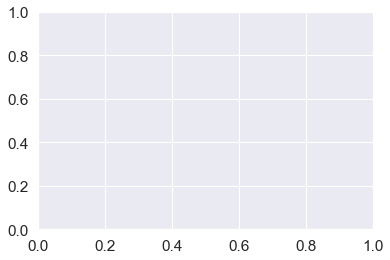

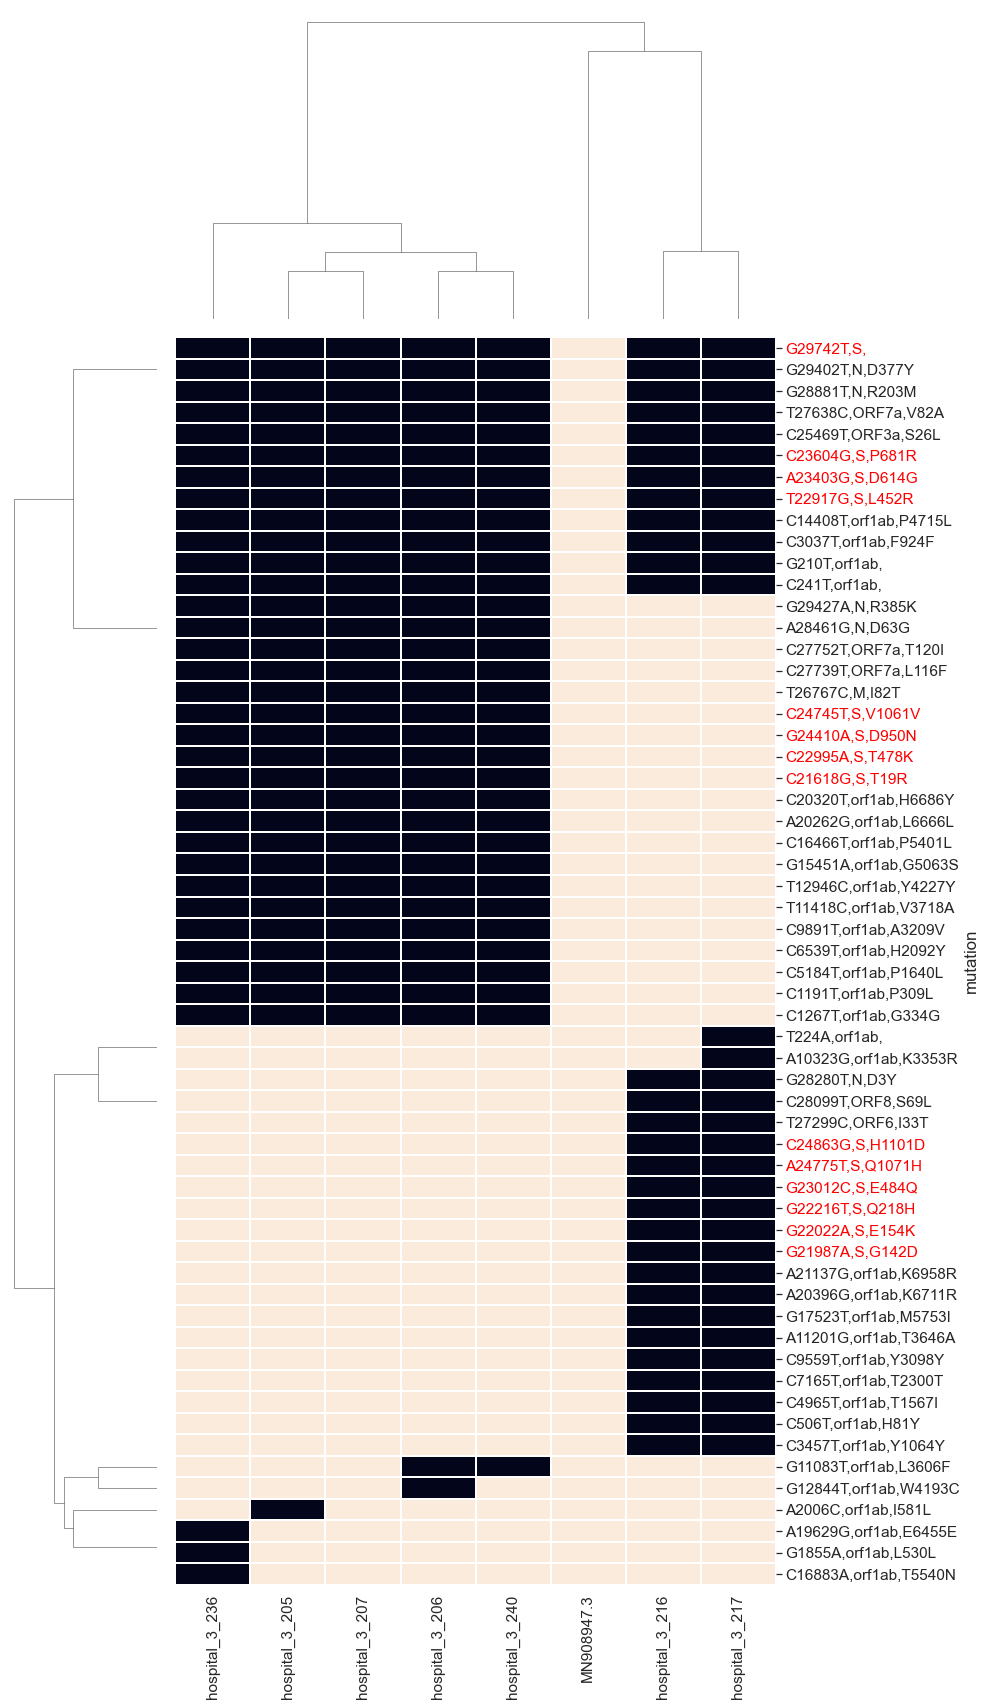

In [ ]:
from matplotlib.patches import Patch

fig,ax = plt.subplots()
cmap = sns.cm.rocket_r
ax = sns.clustermap(heatmap_data,linewidths = 0.4,cmap=cmap, figsize=(14,24))
ax.cax.set_visible(False) # remove color bar

#highlight Spike proteins
for tick_label in ax.ax_heatmap.axes.get_yticklabels():
    if ',S,' in tick_label.get_text():
        tick_label.set_color('red')

# custom legend
legend_handles = [Patch(color=cmap(1), label='Mutated'),
                  Patch(color=cmap(0), label='WT')]
plt.legend(handles = legend_handles,ncol=2, fontsize=8, handlelength=.8)

#
plt.tight_layout()
plt.show()

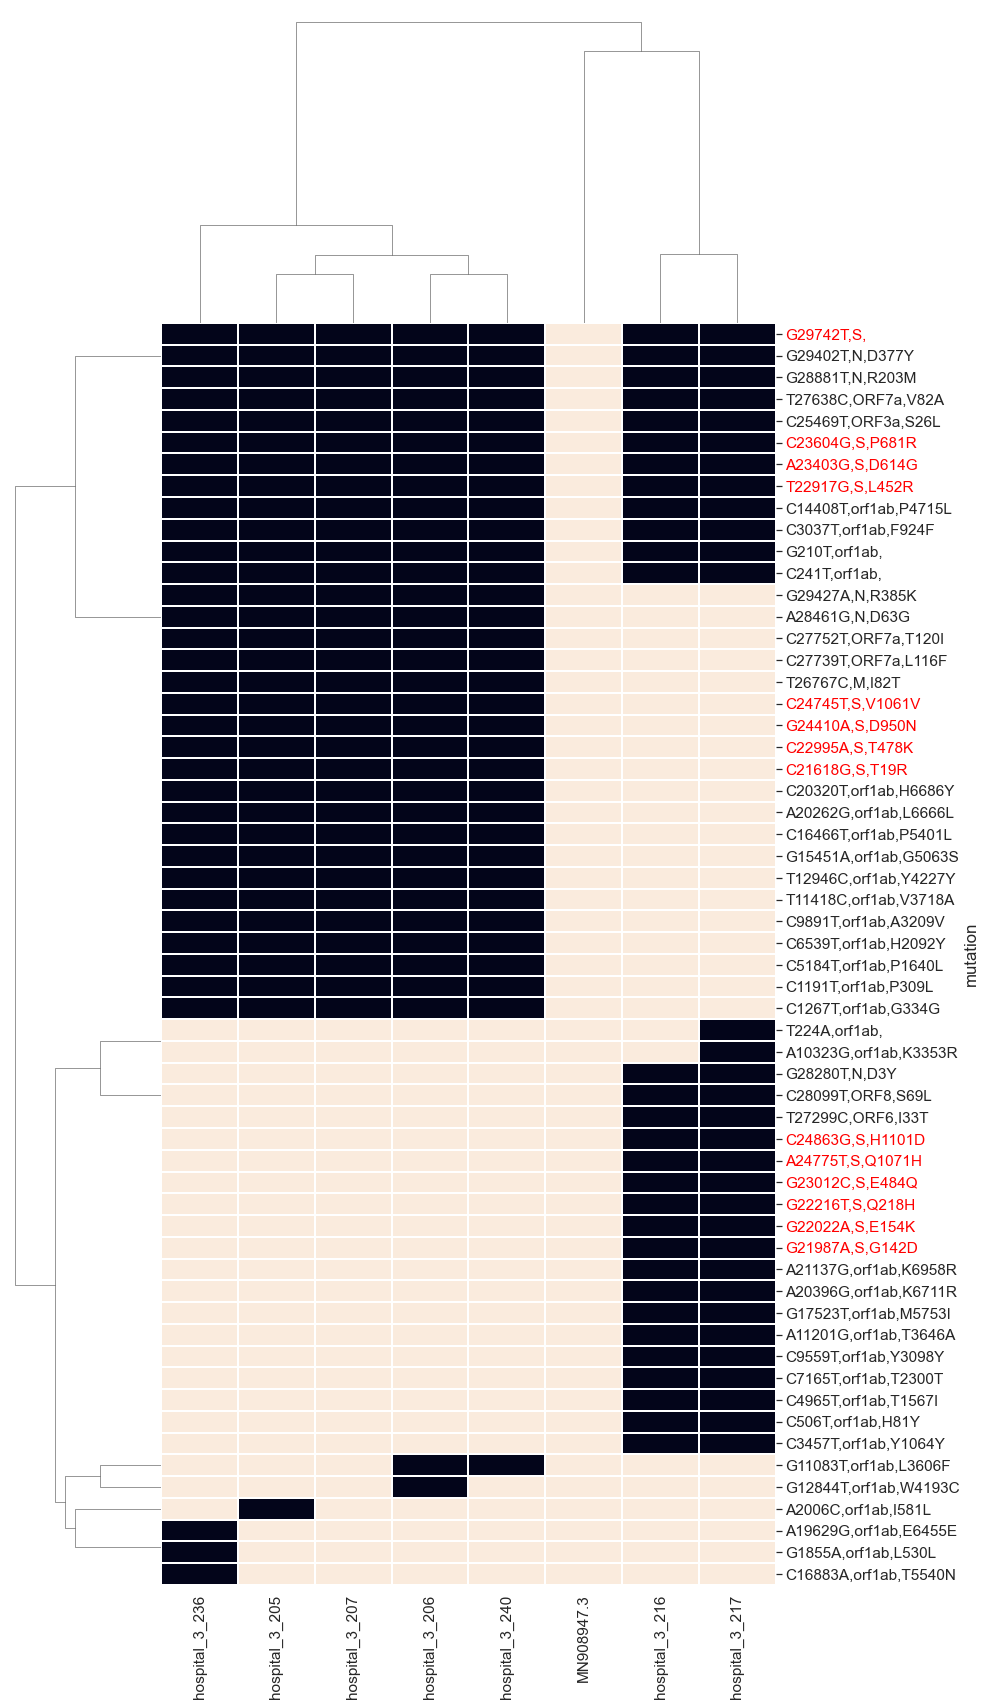

In [ ]:
cmap = sns.cm.rocket_r #sns.cm.rocket_r for continous scale
sns_plot = sns.clustermap(heatmap_data,linewidths = 0.4,cmap=cmap, figsize=(14,24))
sns_plot.cax.set_visible(False) # remove color bar

#highlight Spike proteins
for tick_label in sns_plot.ax_heatmap.axes.get_yticklabels():
    if ',S,' in tick_label.get_text():
        tick_label.set_color('red')

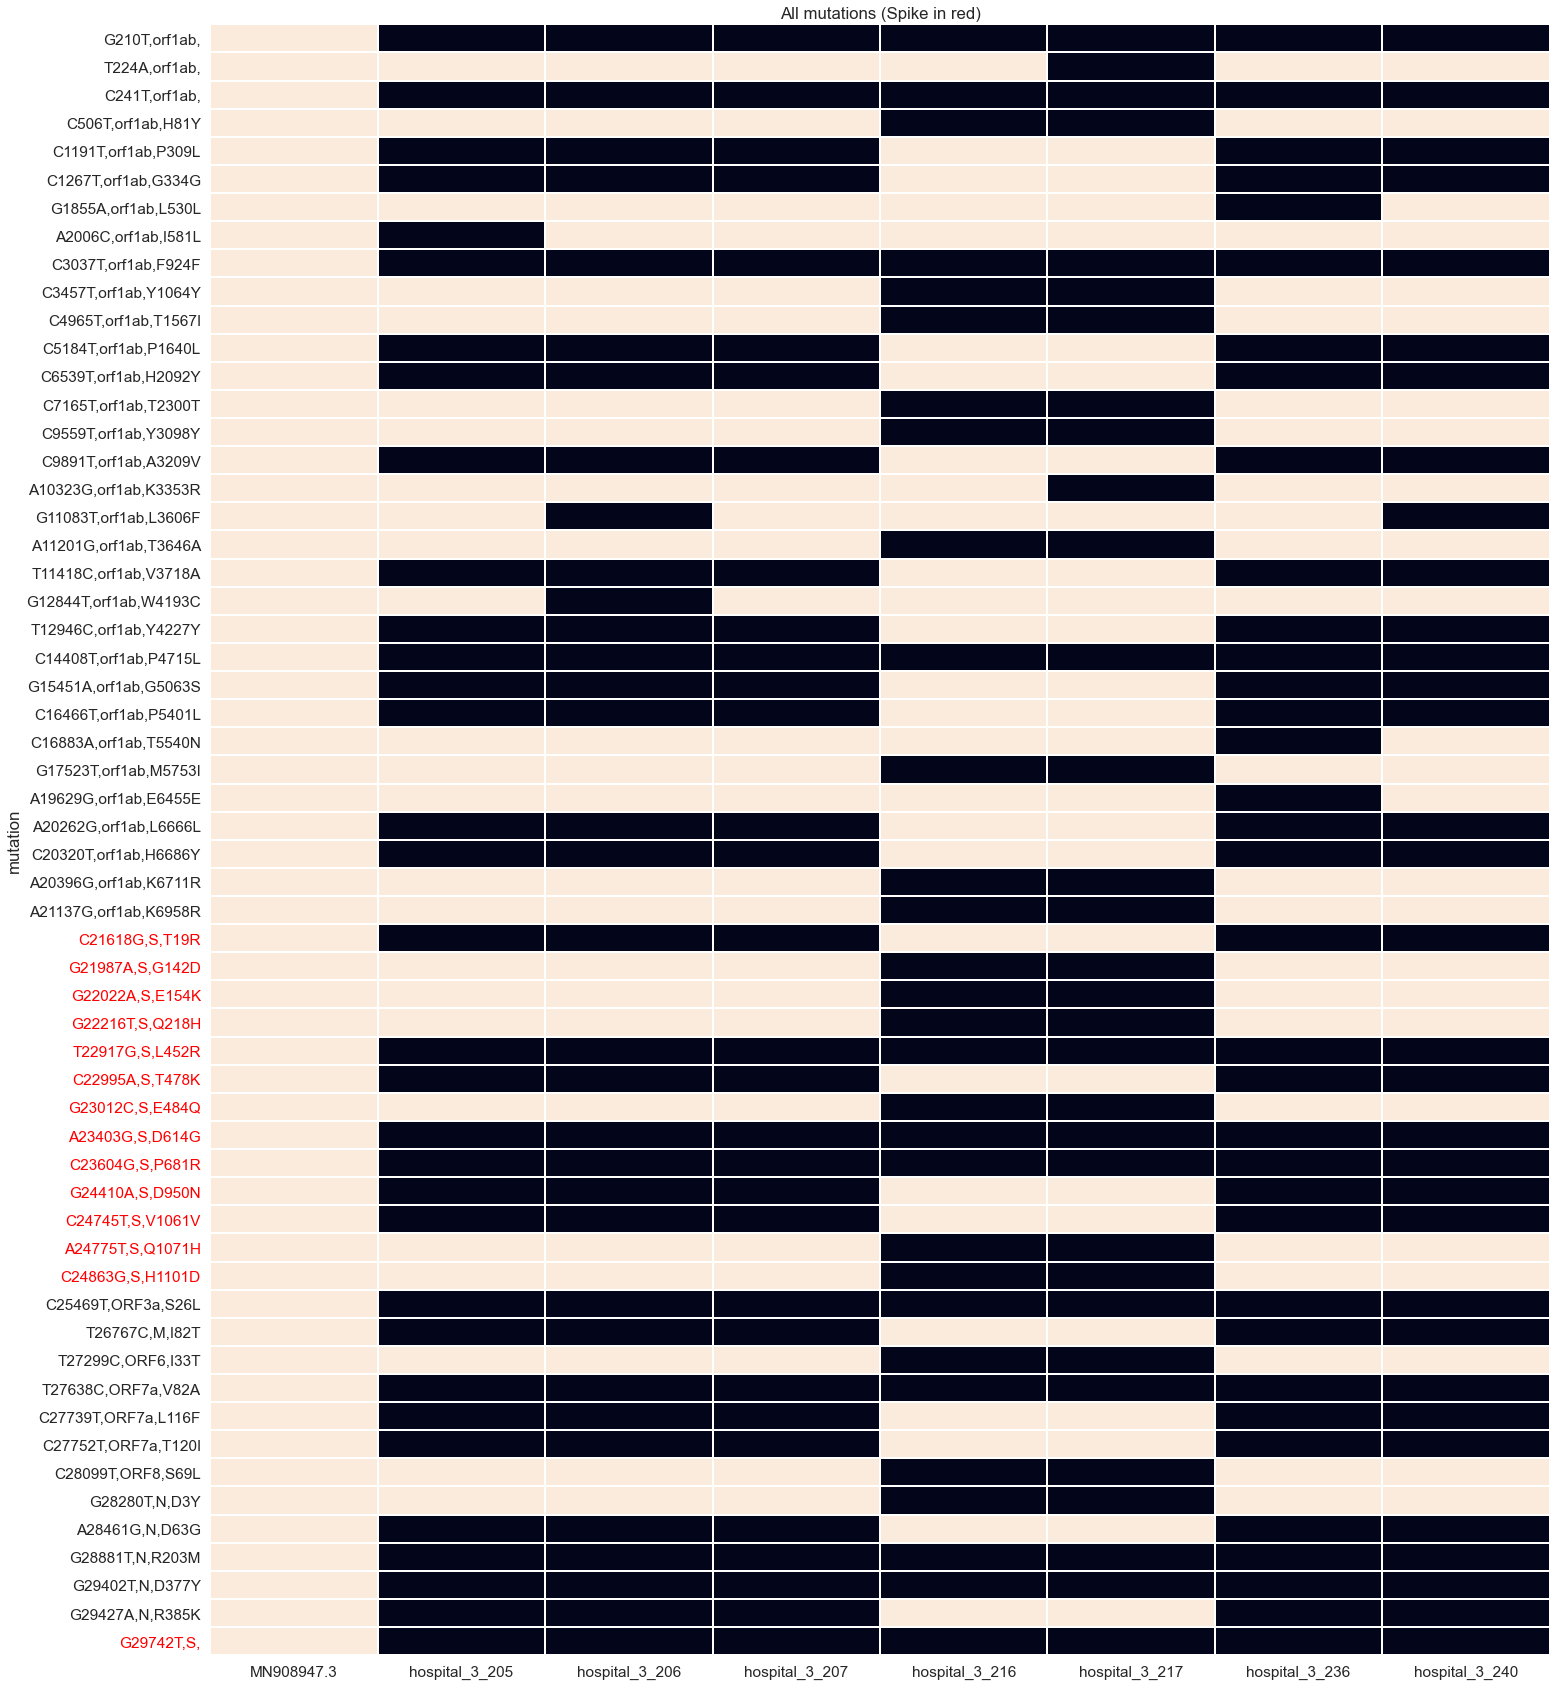

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1,1,figsize=(24,30))
sns_plot2 = sns.heatmap(heatmap_data,linewidths=0.2,ax=ax1,cmap = sns.cm.rocket_r, cbar = False)
for label in sns_plot2.get_yticklabels():
    if ',S,' in label.get_text():
        label.set_color('red')
ax1.title.set_text('All mutations (Spike in red)')

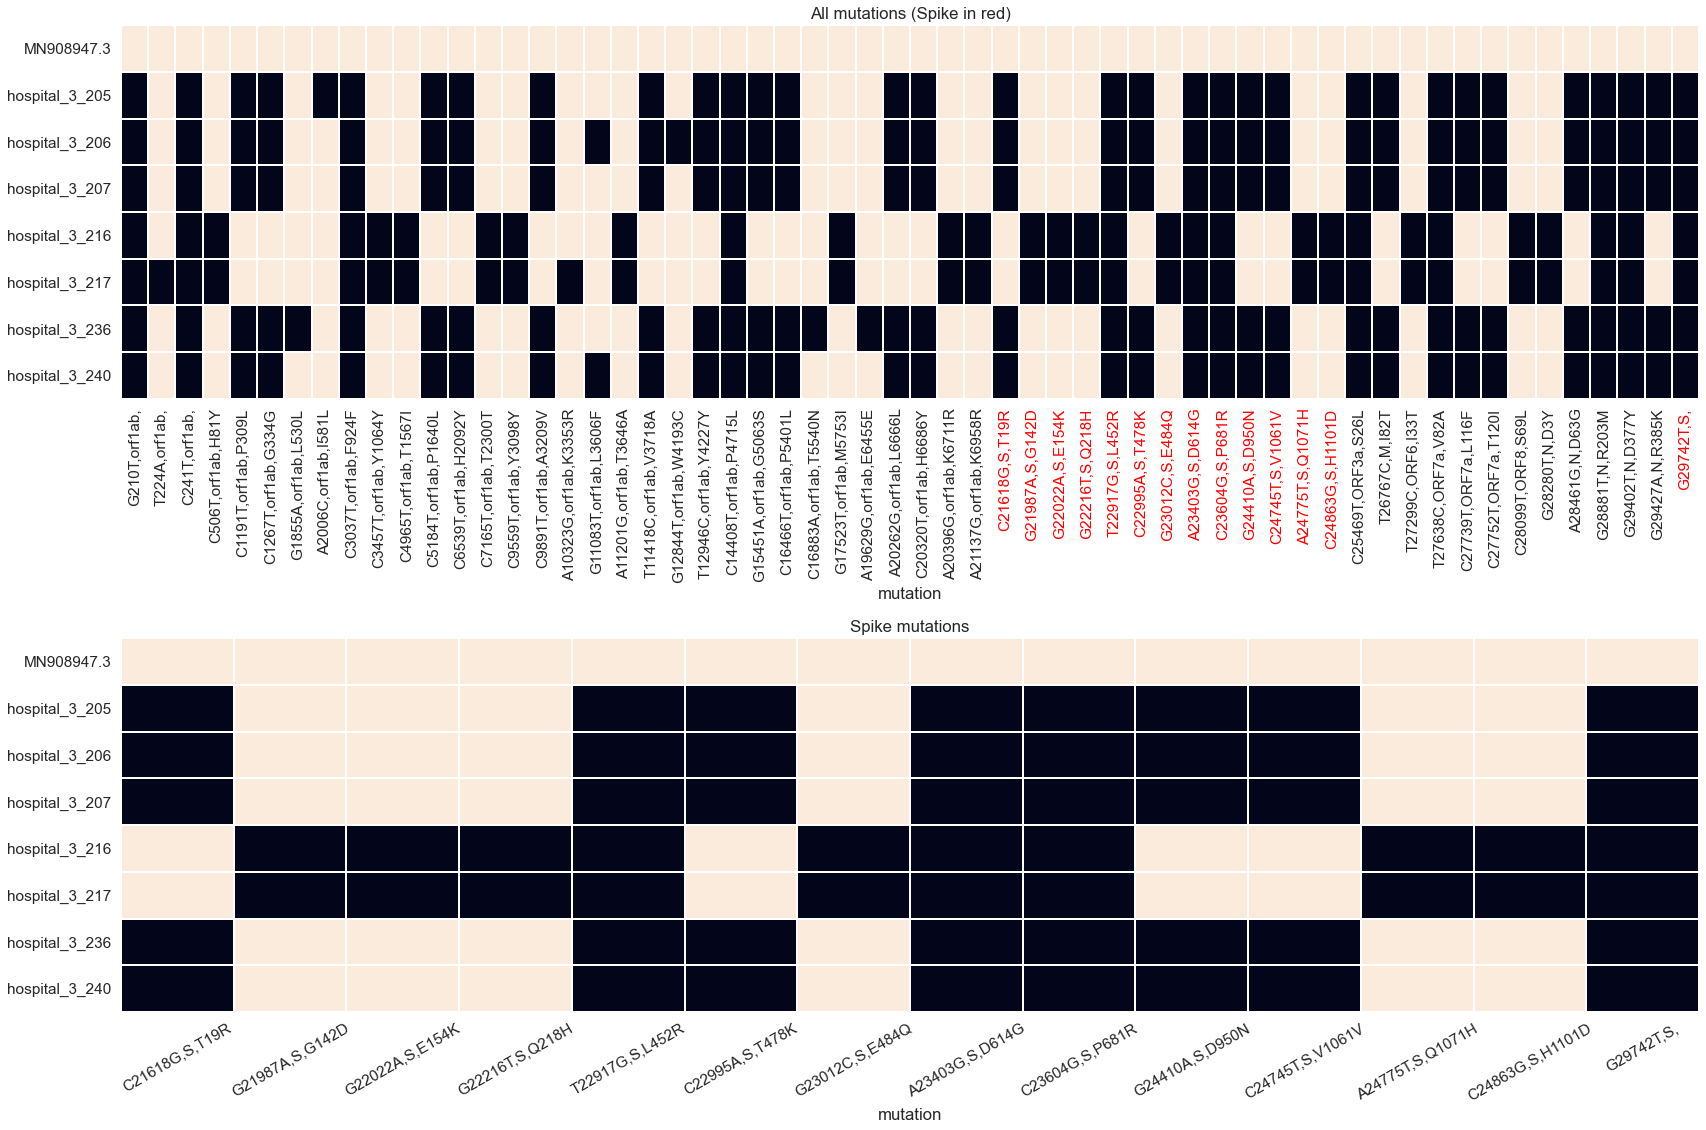

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(24,16))
sns_plot2 = sns.heatmap(heatmap_data.transpose(),linewidths=0.2,ax=ax1,cmap = sns.cm.rocket_r, cbar = False)
for label in sns_plot2.get_xticklabels():
    if ',S,' in label.get_text():
        label.set_color('red')
ax1.title.set_text('All mutations (Spike in red)')

sns_plot_spike = sns.heatmap(heatmap_data_spike.transpose(),linewidths=0.3,cmap=sns.cm.rocket_r,ax=ax2, cbar = False)
ax2.title.set_text('Spike mutations')

plt.xticks(rotation = 30)
fig.tight_layout() # to stop the graphs from overlapping
plt.show()

## 2.3 Transform data to pairwise snp mutation comparison with all vac patients

### 2.3.1 snp-site to pairwise test zone

In [ ]:
v2v_patient_list = hosp3_v2v_ann_vcf.columns[hosp3_v2v_ann_vcf.columns.str.startswith(('hospital_','Hospital_'))]
patient_list = v2v_patient_list.insert(0,'MN908947.3') #add reference as first column and row 
patient_list = patient_list.insert(0,"gi|2050056574|gb|MZ359841.1|") # insert delta 
patient_list

Index(['gi|2050056574|gb|MZ359841.1|', 'MN908947.3', 'hospital_3_199',
       'hospital_3_200', 'hospital_3_203', 'hospital_3_204', 'hospital_3_205',
       'hospital_3_206', 'hospital_3_207', 'hospital_3_212', 'hospital_3_216',
       'hospital_3_217', 'hospital_3_219', 'hospital_3_225', 'hospital_3_230',
       'hospital_3_232', 'hospital_3_233', 'hospital_3_236', 'hospital_3_237',
       'hospital_3_239', 'hospital_3_240', 'hospital_3_241', 'hospital_3_245',
       'hospital_3_246', 'hospital_3_247', 'hospital_3_248', 'hospital_3_249',
       'hospital_3_251', 'hospital_3_254', 'hospital_3_255', 'hospital_3_256',
       'hospital_3_257', 'hospital_3_259', 'hospital_3_261'],
      dtype='object')

In [1566]:
diff_205_206 = hosp3_v2v_ann_vcf['hospital_3_206'] - hosp3_v2v_ann_vcf['hospital_3_207']

mutations_205_206 = hosp3_v2v_ann_vcf.loc[diff_205_206 != 0, ['REF','POS','ALT','Gene_Name','From_AA','location','To_AA','mutation','AA_mutation']]
mutations_205_206['diff'] = diff_205_206
mutations_205_206

,REF,POS,ALT,Gene_Name,From_AA,location,To_AA,mutation,AA_mutation,diff
73,G,11083,T,orf1ab,L,3606,F,"G11083T,orf1ab,L3606F",L3606F,1
85,G,12844,T,orf1ab,W,4193,C,"G12844T,orf1ab,W4193C",W4193C,1
153,A,21944,G,S,I,128,V,"A21944G,S,I128V",I128V,-1


In [1567]:
dup_variant = mutations_205_206[(mutations_205_206['POS'].duplicated(keep =False))]
dup_variant

,REF,POS,ALT,Gene_Name,From_AA,location,To_AA,mutation,AA_mutation,diff


In [1568]:
len(dup_variant['POS'].unique())

0

In [1569]:
for conflicts in range(len(dup_variant['POS'].unique())):
    dup_variant = mutations_205_206[(mutations_205_206['POS'].duplicated(keep =False))]
    resolved_dup_variant = pd.DataFrame.from_dict(dup_variant.to_dict(),orient='index') 
    #-1 is From,1 is To
    from_dup_variant_index = dup_variant.loc[dup_variant['diff']== -1].index[0]
    to_dup_variant_index = dup_variant.loc[dup_variant['diff']==1].index[0]

    resolver_row_index = max(from_dup_variant_index,to_dup_variant_index) + 1

    resolved_dup_variant[resolver_row_index] = resolved_dup_variant.loc[:,to_dup_variant_index]
    resolved_dup_variant.loc['REF',resolver_row_index] = resolved_dup_variant.loc['ALT',from_dup_variant_index]
    resolved_dup_variant.loc['From_AA',resolver_row_index] = resolved_dup_variant.loc['To_AA',from_dup_variant_index]

    resolved_dup_variant.loc['AA_mutation',resolver_row_index] = resolved_dup_variant.loc['From_AA',resolver_row_index] + resolved_dup_variant.loc['location',resolver_row_index] + resolved_dup_variant.loc['To_AA',resolver_row_index]
    resolved_dup_variant.loc['mutation',resolver_row_index] = resolved_dup_variant.loc['REF',resolver_row_index] + str(resolved_dup_variant.loc['POS',resolver_row_index]) + resolved_dup_variant.loc['ALT',resolver_row_index] + ',' + resolved_dup_variant.loc['Gene_Name',resolver_row_index] +',' + resolved_dup_variant.loc['AA_mutation',resolver_row_index]
    resolved_dup_variant.loc['diff',resolver_row_index] = 2 if resolved_dup_variant[resolver_row_index]['REF'] == '*'  else resolved_dup_variant.loc['diff',resolver_row_index]  # check for any * mutations, 2 = REF contains *, 3 = ALT contains *, 4 = mutation to mutation
    resolved_dup_variant.loc['diff',resolver_row_index] = 3 if resolved_dup_variant[resolver_row_index]['ALT'] == '*' else resolved_dup_variant.loc['diff',resolver_row_index]
    resolved_dup_variant.loc['diff',resolver_row_index] = 4 if not resolved_dup_variant.loc[['REF','ALT'],resolver_row_index].str.contains('\*').any() else resolved_dup_variant.loc['diff',resolver_row_index]

    mutations_205_206 = mutations_205_206
    mutations_205_206 = mutations_205_206.append(resolved_dup_variant[resolver_row_index]).sort_index().drop([from_dup_variant_index,to_dup_variant_index])
mutations_205_206

,REF,POS,ALT,Gene_Name,From_AA,location,To_AA,mutation,AA_mutation,diff
73,G,11083,T,orf1ab,L,3606,F,"G11083T,orf1ab,L3606F",L3606F,1
85,G,12844,T,orf1ab,W,4193,C,"G12844T,orf1ab,W4193C",W4193C,1
153,A,21944,G,S,I,128,V,"A21944G,S,I128V",I128V,-1


In [1510]:
resolved_dup_variant = pd.DataFrame.from_dict(dup_variant.to_dict(),orient='index') # 150 is -1(from), #151 is 1(To)
resolved_dup_variant[152] = resolved_dup_variant.loc[:,151]
resolved_dup_variant.loc['REF',152] = resolved_dup_variant.loc['ALT',150]
resolved_dup_variant.loc['From_AA',152] = resolved_dup_variant.loc['To_AA',150]

resolved_dup_variant.loc['AA_mutation',152] = resolved_dup_variant.loc['From_AA',152] + resolved_dup_variant.loc['location',152] + resolved_dup_variant.loc['To_AA',152]
resolved_dup_variant.loc['mutation',152] = resolved_dup_variant.loc['REF',152] + str(resolved_dup_variant.loc['POS',152]) + resolved_dup_variant.loc['ALT',152] + ',' + resolved_dup_variant.loc['Gene_Name',152] +',' + resolved_dup_variant.loc['AA_mutation',152]
resolved_dup_variant.loc['diff',152] = 2 if resolved_dup_variant[152]['REF'] == '*'  else resolved_dup_variant.loc['diff',152]  # check for any * mutations, 2 = REF contains *, 3 = ALT contains *, 4 = mutation to mutation
resolved_dup_variant.loc['diff',152] = 3 if resolved_dup_variant[152]['ALT'] == '*' else resolved_dup_variant.loc['diff',152]
resolved_dup_variant.loc['diff',152] = 4 if not resolved_dup_variant.loc[['REF','ALT'],152].str.contains('\*').any() else resolved_dup_variant.loc['diff',152]
resolved_dup_variant

,150,151,152
REF,T,T,*
POS,21895,21895,21895
ALT,*,C,C
Gene_Name,S,S,S
From_AA,D,D,X
location,111,111,111
To_AA,X,D,D
mutation,"T21895*,S,D111X","T21895C,S,D111D","*21895C,S,X111D"
AA_mutation,D111X,D111D,X111D
diff,-1,1,2


### 2.3.2 Actual functionm writing for later export to script

In [1651]:
def define_direction(row): # check for any * mutations, 2 = REF contains *, 3 = ALT contains *, 4 = mutation to mutation
    if row['diff'] == 1:
        val = '(Forward)'
    elif row['diff'] == -1:
        val = '(Reverse)'
    elif row['diff'] == 2:
        val = '(n_to_mutated)'
    elif row['diff'] ==3:
        val = '(mutated_to_n)'
    elif row['diff']==4:
        val = '(mutated_to_mutated)'
    return val
def find_mutations(patient_a, patient_b):
    mutation_count='placeholder' #to prevent local variable referenced before assignment error
    if patient_a == patient_b:
        output = 'mutation count:0'
        mutation_count = 0
    else:
        diff_a2b = hosp3_v2v_ann_vcf[patient_b] - hosp3_v2v_ann_vcf[patient_a]

        if not any(diff_a2b): # not any() returns true when all diff_a2b values == 0
            output = 'mutation count:0'
            mutation_count = 0
        else: # we made sure we aren't comparing the same patient, or two patients with equal sequences, now resolve differing variants 
            mutations_a2b = hosp3_v2v_ann_vcf.loc[diff_a2b!=0, ['REF','POS','ALT','Gene_Name','From_AA','location','To_AA','mutation','AA_mutation']] # define comparing terms
            mutations_a2b['diff'] = diff_a2b

            dup_variant = mutations_a2b[(mutations_a2b['POS'].duplicated(keep=False))]
            #resolve different variants in the two patients
            for conflicts in range(len(dup_variant['POS'].unique())):
                dup_variant = mutations_a2b[(mutations_a2b['POS'].duplicated(keep=False))]
                resolved_dup_variant = pd.DataFrame.from_dict(dup_variant.to_dict(),orient='index')
                #-1 is from, 1 is To at 'diff'
                from_dup_variant_index = dup_variant.loc[dup_variant['diff']== -1].index[0]
                to_dup_variant_index = dup_variant.loc[dup_variant['diff']==1].index[0]
                resolver_row_index = max(from_dup_variant_index,to_dup_variant_index) + 1

                resolved_dup_variant[resolver_row_index] = resolved_dup_variant.loc[:,to_dup_variant_index]
                resolved_dup_variant.loc['REF',resolver_row_index] = resolved_dup_variant.loc['ALT',from_dup_variant_index]
                resolved_dup_variant.loc['From_AA',resolver_row_index] = resolved_dup_variant.loc['To_AA',from_dup_variant_index]

                resolved_dup_variant.loc['AA_mutation',resolver_row_index] = resolved_dup_variant.loc['From_AA',resolver_row_index] + resolved_dup_variant.loc['location',resolver_row_index] + resolved_dup_variant.loc['To_AA',resolver_row_index]
                resolved_dup_variant.loc['mutation',resolver_row_index] = resolved_dup_variant.loc['REF',resolver_row_index] + str(resolved_dup_variant.loc['POS',resolver_row_index]) + resolved_dup_variant.loc['ALT',resolver_row_index] + ',' + resolved_dup_variant.loc['Gene_Name',resolver_row_index] +',' + resolved_dup_variant.loc['AA_mutation',resolver_row_index]
                resolved_dup_variant.loc['diff',resolver_row_index] = 2 if resolved_dup_variant[resolver_row_index]['REF'] == '*'  else resolved_dup_variant.loc['diff',resolver_row_index]  # check for any * mutations, 2 = REF contains *, 3 = ALT contains *, 4 = mutation to mutation
                resolved_dup_variant.loc['diff',resolver_row_index] = 3 if resolved_dup_variant[resolver_row_index]['ALT'] == '*' else resolved_dup_variant.loc['diff',resolver_row_index]
                resolved_dup_variant.loc['diff',resolver_row_index] = 4 if not resolved_dup_variant.loc[['REF','ALT'],resolver_row_index].str.contains('\*').any() else resolved_dup_variant.loc['diff',resolver_row_index]

                mutations_a2b = mutations_a2b.append(resolved_dup_variant[resolver_row_index]).sort_index().drop([from_dup_variant_index,to_dup_variant_index])

            mutations_a2b['direction'] = mutations_a2b.apply(define_direction,axis=1) # apply function on row 
            mutations_a2b['output_string'] = mutations_a2b['mutation'] + mutations_a2b['direction']
            mutation_count = len(mutations_a2b)
            output = 'mutation_count:' + str(mutation_count) + '\n' + '\n'.join(mutations_a2b['output_string'].apply(str))
    return (output,mutation_count)

In [1652]:
def mutation_comparison_against_all(patient_for_comparison): #define function that creates list for filling in rows 
    Mutation_patient_list = []
    mutation_count_patient_list = []
    for patient in patient_list:
        pairwise_mutation = find_mutations(patient_for_comparison,patient)[0]
        Mutation_patient_list.append(pairwise_mutation)

        pairwise_mutation_count = find_mutations(patient_for_comparison,patient)[1]
        mutation_count_patient_list.append(pairwise_mutation_count)

    return Mutation_patient_list, mutation_count_patient_list
new_df = pd.DataFrame(columns=patient_list,index = patient_list)
for anchoring_patient in patient_list:
    new_df.loc[anchoring_patient] = mutation_comparison_against_all(anchoring_patient)[0]
new_df

,gi|2050056574|gb|MZ359841.1|,MN908947.3,hospital_3_199,hospital_3_200,hospital_3_203,hospital_3_204,hospital_3_205,hospital_3_206,hospital_3_207,hospital_3_212,...,hospital_3_247,hospital_3_248,hospital_3_249,hospital_3_251,hospital_3_254,hospital_3_255,hospital_3_256,hospital_3_257,hospital_3_259,hospital_3_261
gi|2050056574|gb|MZ359841.1|,mutation count:0,"mutation_count:35\nG210T,orf1ab,(Reverse)\nC24...","mutation_count:26\nG1048T,orf1ab,K261N(Reverse...","mutation_count:82\nG210T,orf1ab,(Reverse)\nC91...","mutation_count:35\nG1048T,orf1ab,K261N(Reverse...","mutation_count:53\nT383G,orf1ab,S40A(Forward)\...","mutation_count:32\nG1048T,orf1ab,K261N(Reverse...","mutation_count:29\nG1048T,orf1ab,K261N(Reverse...","mutation_count:28\nG1048T,orf1ab,K261N(Reverse...","mutation_count:28\nG1048T,orf1ab,K261N(Reverse...",...,"mutation_count:31\nG1048T,orf1ab,K261N(Reverse...","mutation_count:8\nG1048T,orf1ab,K261N(Reverse)...","mutation_count:28\nG1048T,orf1ab,K261N(Reverse...","mutation_count:18\nG1048T,orf1ab,K261N(Reverse...","mutation_count:29\nT241*,orf1ab,X(mutated_to_n...","mutation_count:31\nG1048T,orf1ab,K261N(Reverse...","mutation_count:19\nG1048T,orf1ab,K261N(Reverse...","mutation_count:17\nG1048T,orf1ab,K261N(Reverse...","mutation_count:33\nG1048T,orf1ab,K261N(Reverse...","mutation_count:27\nA396T,orf1ab,Q44L(Forward)\..."
MN908947.3,"mutation_count:35\nG210T,orf1ab,(Forward)\nC24...",mutation count:0,"mutation_count:33\nG210T,orf1ab,(Forward)\nC24...","mutation_count:58\nC241T,orf1ab,(Forward)\nC91...","mutation_count:40\nG210T,orf1ab,(Forward)\nC24...","mutation_count:57\nG210T,orf1ab,(Forward)\nC24...","mutation_count:37\nG210T,orf1ab,(Forward)\nC24...","mutation_count:34\nG210T,orf1ab,(Forward)\nC24...","mutation_count:33\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...",...,"mutation_count:36\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:45\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:38\nG210T,orf1ab,(Forward)\nC24...","mutation_count:46\nG210T,orf1ab,(Forward)\nC24...","mutation_count:46\nG210T,orf1ab,(Forward)\nC24...","mutation_count:40\nG210T,orf1ab,(Forward)\nC24...","mutation_count:55\nG210T,orf1ab,(Forward)\nC24..."
hospital_3_199,"mutation_count:26\nG1048T,orf1ab,K261N(Forward...","mutation_count:33\nG210T,orf1ab,(Reverse)\nC24...",mutation count:0,"mutation_count:80\nG210T,orf1ab,(Reverse)\nC91...","mutation_count:11\nG1820A,orf1ab,G519S(Forward...","mutation_count:32\nT383G,orf1ab,S40A(Forward)\...","mutation_count:6\nA2006C,orf1ab,I581L(Forward)...","mutation_count:3\nG11083T,orf1ab,L3606F(Forwar...","mutation_count:2\nA21944G,S,I128V(Forward)\nG2...","mutation_count:10\nC6539T,orf1ab,H2092Y(Revers...",...,"mutation_count:5\nC3811T,orf1ab,L1182L(Forward...","mutation_count:28\nC1191T,orf1ab,P309L(Reverse...","mutation_count:2\nC1997T,orf1ab,L578L(Forward)...","mutation_count:38\nC1191T,orf1ab,P309L(Reverse...","mutation_count:11\nT241*,orf1ab,X(mutated_to_n...","mutation_count:5\nC3045T,orf1ab,P927L(Forward)...","mutation_count:39\nC1191T,orf1ab,P309L(Reverse...","mutation_count:37\nC1191T,orf1ab,P309L(Reverse...","mutation_count:7\nC12784T,orf1ab,N4173N(Forwar...","mutation_count:47\nA396T,orf1ab,Q44L(Forward)\..."
hospital_3_200,"mutation_count:82\nG210T,orf1ab,(Forward)\nC91...","mutation_count:58\nC241T,orf1ab,(Reverse)\nC91...","mutation_count:80\nG210T,orf1ab,(Forward)\nC91...",mutation count:0,"mutation_count:84\nG210T,orf1ab,(Forward)\nC91...","mutation_count:82\nG210T,orf1ab,(Forward)\nT38...","mutation_count:83\nG210T,orf1ab,(Forward)\nC91...","mutation_count:81\nG210T,orf1ab,(Forward)\nC91...","mutation_count:80\nG210T,orf1ab,(Forward)\nC91...","mutation_count:82\nG210T,orf1ab,(Forward)\nC91...",...,"mutation_count:83\nG210T,orf1ab,(Forward)\nC91...","mutation_count:80\nG210T,orf1ab,(Forward)\nC91

In [1653]:
new_count_df = pd.DataFrame(columns=patient_list,index = patient_list)
for anchoring_patient in patient_list:
    new_count_df.loc[anchoring_patient] = mutation_comparison_against_all(anchoring_patient)[1]
new_count_df

,gi|2050056574|gb|MZ359841.1|,MN908947.3,hospital_3_199,hospital_3_200,hospital_3_203,hospital_3_204,hospital_3_205,hospital_3_206,hospital_3_207,hospital_3_212,...,hospital_3_247,hospital_3_248,hospital_3_249,hospital_3_251,hospital_3_254,hospital_3_255,hospital_3_256,hospital_3_257,hospital_3_259,hospital_3_261
gi|2050056574|gb|MZ359841.1|,0,35,26,82,35,53,32,29,28,28,...,31,8,28,18,29,31,19,17,33,27
MN908947.3,35,0,33,58,40,57,37,34,33,35,...,36,35,35,45,35,38,46,46,40,55
hospital_3_199,26,33,0,80,11,32,6,3,2,10,...,5,28,2,38,11,5,39,37,7,47
hospital_3_200,82,58,80,0,84,82,83,81,80,82,...,83,80,82,75,83,85,75,76,86,80
hospital_3_203,35,40,11,84,0,38,11,12,10,19,...,14,34,13,45,20,16,44,44,14,49
hospital_3_204,53,57,32,82,38,0,31,34,32,38,...,35,52,34,44,41,37,41,44,33,41
hospital_3_205,32,37,6,83,11,31,0,7,5,16,...,9,31,8,42,17,11,38,40,5,44
hospital_3_206,29,34,3,81,12,34,7,0,3,13,...,6,29,5,39,14,8,40,40,10,49
hospital_3_207,28,33,2,80,10,32,5,3,0,12,...,5,28,4,38,13,7,38,39,8,47
hospital_3_212,28,35,10,82,19,38,16,13,12,0,...,15,30,12,40,11,15,41,39,17,47


In [1654]:
def find_true_mutations(patient_a, patient_b): # excludes unknown nucleotides
    mutation_count='placeholder' #to prevent local variable referenced before assignment error
    if patient_a == patient_b:
        output = 'mutation count:0'
        mutation_count = 0
    else:
        diff_a2b = hosp3_v2v_ann_vcf[patient_b] -hosp3_v2v_ann_vcf[patient_a]

        if not any(diff_a2b): # not any() returns true when all diff_a2b values == 0
            output = 'mutation count:0'
            mutation_count = 0
        else: # we made sure we aren't comparing the same patient, or two patients with equal sequences, now resolve differing variants 
            mutations_a2b = hosp3_v2v_ann_vcf.loc[diff_a2b!=0, ['REF','POS','ALT','Gene_Name','From_AA','location','To_AA','mutation','AA_mutation']] # define comparing terms
            mutations_a2b['diff'] = diff_a2b
            
            dup_variant = mutations_a2b[(mutations_a2b['POS'].duplicated(keep=False))]
            #resolve different variants in the two patients
            for conflicts in range(len(dup_variant['POS'].unique())):
                dup_variant = mutations_a2b[(mutations_a2b['POS'].duplicated(keep=False))]
                resolved_dup_variant = pd.DataFrame.from_dict(dup_variant.to_dict(),orient='index')
                #-1 is from, 1 is To at 'diff'
                from_dup_variant_index = dup_variant.loc[dup_variant['diff']== -1].index[0]
                to_dup_variant_index = dup_variant.loc[dup_variant['diff']==1].index[0]
                resolver_row_index = max(from_dup_variant_index,to_dup_variant_index) + 1

                resolved_dup_variant[resolver_row_index] = resolved_dup_variant.loc[:,to_dup_variant_index]
                resolved_dup_variant.loc['REF',resolver_row_index] = resolved_dup_variant.loc['ALT',from_dup_variant_index]
                resolved_dup_variant.loc['From_AA',resolver_row_index] = resolved_dup_variant.loc['To_AA',from_dup_variant_index]

                resolved_dup_variant.loc['AA_mutation',resolver_row_index] = resolved_dup_variant.loc['From_AA',resolver_row_index] + resolved_dup_variant.loc['location',resolver_row_index] + resolved_dup_variant.loc['To_AA',resolver_row_index]
                resolved_dup_variant.loc['mutation',resolver_row_index] = resolved_dup_variant.loc['REF',resolver_row_index] + str(resolved_dup_variant.loc['POS',resolver_row_index]) + resolved_dup_variant.loc['ALT',resolver_row_index] + ',' + resolved_dup_variant.loc['Gene_Name',resolver_row_index] +',' + resolved_dup_variant.loc['AA_mutation',resolver_row_index]
                resolved_dup_variant.loc['diff',resolver_row_index] = 2 if resolved_dup_variant[resolver_row_index]['REF'] == '*'  else resolved_dup_variant.loc['diff',resolver_row_index]  # check for any * mutations, 2 = REF contains *, 3 = ALT contains *, 4 = mutation to mutation
                resolved_dup_variant.loc['diff',resolver_row_index] = 3 if resolved_dup_variant[resolver_row_index]['ALT'] == '*' else resolved_dup_variant.loc['diff',resolver_row_index]
                resolved_dup_variant.loc['diff',resolver_row_index] = 4 if not resolved_dup_variant.loc[['REF','ALT'],resolver_row_index].str.contains('\*').any() else resolved_dup_variant.loc['diff',resolver_row_index]

                mutations_a2b = mutations_a2b.append(resolved_dup_variant[resolver_row_index]).sort_index().drop([from_dup_variant_index,to_dup_variant_index])
            
            mutations_a2b['direction'] = mutations_a2b.apply(define_direction,axis=1)
            mutations_a2b['output_string'] = mutations_a2b['mutation'] + mutations_a2b['direction']
            mutations_a2b = mutations_a2b[~mutations_a2b.output_string.str.contains("\*")] ### exclude rows where there is a * included
            mutation_count = len(mutations_a2b)
            output = 'mutation_count:' + str(mutation_count) + '\n' + '\n'.join(mutations_a2b['output_string'].apply(str))
    return (output,mutation_count)

def true_mutation_comaprison_against_all(patient_for_comparison): #define function that creates list for filling in rows 
    Mutation_patient_list = []
    mutation_count_patient_list = []
    for patient in patient_list:
        pairwise_mutation = find_true_mutations(patient_for_comparison,patient)[0]
        Mutation_patient_list.append(pairwise_mutation)

        pairwise_mutation_count = find_true_mutations(patient_for_comparison,patient)[1]
        mutation_count_patient_list.append(pairwise_mutation_count)
    return Mutation_patient_list, mutation_count_patient_list

n_not_included_df =  pd.DataFrame(columns=patient_list,index = patient_list)
for anchoring_patient in patient_list:
    n_not_included_df.loc[anchoring_patient] = true_mutation_comaprison_against_all(anchoring_patient)[0]
n_not_included_df

,gi|2050056574|gb|MZ359841.1|,MN908947.3,hospital_3_199,hospital_3_200,hospital_3_203,hospital_3_204,hospital_3_205,hospital_3_206,hospital_3_207,hospital_3_212,...,hospital_3_247,hospital_3_248,hospital_3_249,hospital_3_251,hospital_3_254,hospital_3_255,hospital_3_256,hospital_3_257,hospital_3_259,hospital_3_261
gi|2050056574|gb|MZ359841.1|,mutation count:0,"mutation_count:35\nG210T,orf1ab,(Reverse)\nC24...","mutation_count:26\nG1048T,orf1ab,K261N(Reverse...","mutation_count:66\nG210T,orf1ab,(Reverse)\nC91...","mutation_count:32\nG1048T,orf1ab,K261N(Reverse...","mutation_count:31\nT383G,orf1ab,S40A(Forward)\...","mutation_count:28\nG1048T,orf1ab,K261N(Reverse...","mutation_count:29\nG1048T,orf1ab,K261N(Reverse...","mutation_count:28\nG1048T,orf1ab,K261N(Reverse...","mutation_count:27\nG1048T,orf1ab,K261N(Reverse...",...,"mutation_count:31\nG1048T,orf1ab,K261N(Reverse...","mutation_count:8\nG1048T,orf1ab,K261N(Reverse)...","mutation_count:28\nG1048T,orf1ab,K261N(Reverse...","mutation_count:8\nG1048T,orf1ab,K261N(Reverse)...","mutation_count:28\nG1048T,orf1ab,K261N(Reverse...","mutation_count:31\nG1048T,orf1ab,K261N(Reverse...","mutation_count:8\nG1048T,orf1ab,K261N(Reverse)...","mutation_count:15\nG1048T,orf1ab,K261N(Reverse...","mutation_count:29\nG1048T,orf1ab,K261N(Reverse...","mutation_count:9\nA396T,orf1ab,Q44L(Forward)\n..."
MN908947.3,"mutation_count:35\nG210T,orf1ab,(Forward)\nC24...",mutation count:0,"mutation_count:33\nG210T,orf1ab,(Forward)\nC24...","mutation_count:42\nC241T,orf1ab,(Forward)\nC91...","mutation_count:37\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:33\nG210T,orf1ab,(Forward)\nC24...","mutation_count:34\nG210T,orf1ab,(Forward)\nC24...","mutation_count:33\nG210T,orf1ab,(Forward)\nC24...","mutation_count:34\nG210T,orf1ab,(Forward)\nC24...",...,"mutation_count:36\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:34\nG210T,orf1ab,(Forward)\nC11...","mutation_count:38\nG210T,orf1ab,(Forward)\nC24...","mutation_count:35\nG210T,orf1ab,(Forward)\nC24...","mutation_count:44\nG210T,orf1ab,(Forward)\nC24...","mutation_count:36\nG210T,orf1ab,(Forward)\nC24...","mutation_count:37\nG210T,orf1ab,(Forward)\nC24..."
hospital_3_199,"mutation_count:26\nG1048T,orf1ab,K261N(Forward...","mutation_count:33\nG210T,orf1ab,(Reverse)\nC24...",mutation count:0,"mutation_count:64\nG210T,orf1ab,(Reverse)\nC91...","mutation_count:8\nG1820A,orf1ab,G519S(Forward)...","mutation_count:10\nT383G,orf1ab,S40A(Forward)\...","mutation_count:2\nA2006C,orf1ab,I581L(Forward)...","mutation_count:3\nG11083T,orf1ab,L3606F(Forwar...","mutation_count:2\nA21944G,S,I128V(Forward)\nG2...","mutation_count:9\nC6539T,orf1ab,H2092Y(Reverse...",...,"mutation_count:5\nC3811T,orf1ab,L1182L(Forward...","mutation_count:28\nC1191T,orf1ab,P309L(Reverse...","mutation_count:2\nC1997T,orf1ab,L578L(Forward)...","mutation_count:28\nC1191T,orf1ab,P309L(Reverse...","mutation_count:10\nC6539T,orf1ab,H2092Y(Revers...","mutation_count:5\nC3045T,orf1ab,P927L(Forward)...","mutation_count:28\nC1191T,orf1ab,P309L(Reverse...","mutation_count:35\nC1191T,orf1ab,P309L(Reverse...","mutation_count:3\nC12784T,orf1ab,N4173N(Forwar...","mutation_count:29\nA396T,orf1ab,Q44L(Forward)\..."
hospital_3_200,"mutation_count:66\nG210T,orf1ab,(Forward)\nC91...","mutation_count:42\nC241T,orf1ab,(Reverse)\nC91...","mutation_count:64\nG210T,orf1ab,(Forward)\nC91...",mutation count:0,"mutation_count:67\nG210T,orf1ab,(Forward)\nC91...","mutation_count:66\nG210T,orf1ab,(Forward)\nT38...","mutation_count:63\nG210T,orf1ab,(Forward)\nC91...","mutation_count:65\nG210T,orf1ab,(Forward)\nC91...","mutation_count:64\nG210T,orf1ab,(Forward)\nC91...","mutation_count:65\nG210T,orf1ab,(Forward)\nC91...",...,"mutation_count:67\nG210T,orf1ab,(Forward)\nC91...","mutation_count:65\nG210T,orf1ab,(Forward)\nC91

In [1655]:
n_not_included_count_df = pd.DataFrame(columns=patient_list,index = patient_list)
for anchoring_patient in patient_list:
    n_not_included_df.loc[anchoring_patient] = true_mutation_comaprison_against_all(anchoring_patient)[1]
n_not_included_df

,gi|2050056574|gb|MZ359841.1|,MN908947.3,hospital_3_199,hospital_3_200,hospital_3_203,hospital_3_204,hospital_3_205,hospital_3_206,hospital_3_207,hospital_3_212,...,hospital_3_247,hospital_3_248,hospital_3_249,hospital_3_251,hospital_3_254,hospital_3_255,hospital_3_256,hospital_3_257,hospital_3_259,hospital_3_261
gi|2050056574|gb|MZ359841.1|,0,35,26,66,32,31,28,29,28,27,...,31,8,28,8,28,31,8,15,29,9
MN908947.3,35,0,33,42,37,35,33,34,33,34,...,36,35,35,35,34,38,35,44,36,37
hospital_3_199,26,33,0,64,8,10,2,3,2,9,...,5,28,2,28,10,5,28,35,3,29
hospital_3_200,66,42,64,0,67,66,63,65,64,65,...,67,65,66,65,66,69,64,65,66,64
hospital_3_203,32,37,8,67,0,17,8,9,7,15,...,11,31,10,32,16,13,32,41,11,34
hospital_3_204,31,35,10,66,17,0,11,12,10,16,...,13,30,12,32,18,15,30,30,13,33
hospital_3_205,28,33,2,63,8,11,0,3,1,11,...,5,27,4,28,12,7,27,36,5,30
hospital_3_206,29,34,3,65,9,12,3,0,3,12,...,6,29,5,29,13,8,29,38,6,31
hospital_3_207,28,33,2,64,7,10,1,3,0,11,...,5,28,4,28,12,7,27,37,4,29
hospital_3_212,27,34,9,65,15,16,11,12,11,0,...,14,29,11,29,9,14,29,36,12,29


In [1656]:
# # from openpyxl import load_workbook
# # 
# book = load_workbook('consistent_contacts_with_likelihood.xlsx')

# with pd.ExcelWriter('consistent_contacts_with_likelihood.xlsx', engine = 'openpyxl') as writer:
#     writer.book = book
#     writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

#     new_df.to_excel(writer,sheet_name='v2v_pairwise_snp', index = True)
#     writer.save()

In [1657]:
with pd.ExcelWriter('supaaaa.xlsx', engine = 'openpyxl') as writer:
    new_df.to_excel(writer, sheet_name = 'n_included', index = True)
    new_count_df.to_excel(writer, sheet_name = 'n_included_count', index = True)
    #n_not_included
    n_not_included_df.to_excel(writer, sheet_name='n_not_included', index = True)
    n_not_included_count_df.to_excel(writer,sheet_name='n_not_included_count',index=True)
    writer.save()